<div style="background-color: #004d4d; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">

<table>
  <tr>
    <th style="background-color: #006666; color: white; font-size: 18px;">Alumno</th>
    <th style="background-color: #006666; color: white; font-size: 18px;">Padrón</th>
  </tr>
  <tr>
    <td style="background-color: #004d4d; color: white; font-size: 18px;">BATALLAN, David Leonardo</td>
    <td style="background-color: #004d4d; color: white; font-size: 18px;">97529</td>
  </tr>
</table>

</div>

## **[Notebook](https://drive.google.com/drive/folders/1VL4C4csD58DLd7jf_X-EY2jKCrk-XFD2?usp=sharing)**

<div style="background-color: #004d4d; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">

# **TRABAJO PRÁCTICO: ANÁLISIS EXPLORATORIO DE LOS DATOS**

</div>

## **ENUNCIADO**

Consigna General

El trabajo práctico de este cuatrimestre consta de cuatro entregas:

    Pandas
    Visualizaciones
    Spark
    Machine Learning.

En todas ellas trabajaremos con este dataset.

Los datos presentados son transacciones electrónicas de pago, con información relacionada a la misma que va desde el importe, dispositivo en que fue realizada, hasta si se trataba de un intento de fraude o no. Esto podemos encontrarlo en el archivo **transaction**, indicado en la columna **target**.

En un futuro trabajaremos para entrenar un modelo que nos permita predecir el valor de esa columna, pero por ahora vamos a dedicarle tiempo a analizar esos datos.
**Primera Entrega (Analisis exploratorio)**

Trabajaremos entonces en el análisis exploratorio de los datos presentados. Para esto, vamos a presentarles algunas consultas a resolver en Pandas. Si bien deben estar resueltas, no son la totalidad de la entrega. La idea es que sirvan de base para comenzar a entender los datos, investigarlos y sacar conclusiones.

- ¿Cuál es la proporción de transacciones fraudulentas?
- ¿Qué relación existe entre el tipo de producto y el monto de la transacción y la columna target? Calcular qué proporción de transacciones son fraudulentas para cada tipo de producto, y verificar si existe impacto.
- Al mismo tiempo, ¿los fraudulentos eligen algún tipo de producto en particular? Calcular para las transacciones fraudulentas, qué proporción corresponde a cada uno de los tipos de producto. ¿Se puede sacar alguna conclusión?
- ¿Cuál es el monto promedio de las transacciones fraudulentas? (discriminado por dispositivo) Calcularlo y comprobar si existe o no impacto.
- ¿Cuál es el impacto del tiempo en la probabilidad de fraude?¿Cómo se distribuyen los casos fraudulentos a lo largo del tiempo?
- Apoyarse del valor de timestamp para calcular la distribución de transacciones fraudulentas. Verificar el porcentaje de dichas transacciones a lo largo del tiempo. ¿Se puede llegar a alguna conclusión en base a esta información?
- ¿Hay alguna plataforma más utilizada que otras para cometer fraude?
- ¿Hay alguna tarjeta preferida por los fraudulentos?
- En los datos vemos gran cantidad de valores nulos, ¿cómo los manejarías?

Estas preguntas deben usarse como puntapié para desarrollar el análisis, intentando descubrir la relación que existe entre los distintos atributos y el target.

## **Importo bibliotecas para manejo de pandas y descarga de archivos del Drive**

In [ ]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
pip install squarify

In [ ]:
from datetime import datetime
import squarify as squarify
import plotly.express as px
from wordcloud import WordCloud


In [ ]:
plt.rcParams['figure.facecolor'] = '#FFFFFF'  # bluish dark grey
#plt.rcParams['axes.facecolor'] = '#eaeaf2' # bluish dark grey
plt.rcParams['axes.facecolor'] = '#FFFFFF' # bluish dark grey
#plt.rcParams['axes.facecolor'] = '#e5ecf6' # bluish dark grey
#legend.borderaxespad
plt.rcParams['legend.borderaxespad'] = 0 # separacion de legend
plt.rcParams['axes.edgecolor'] = 'k'
plt.rcParams['axes.axisbelow'] = True


plt.rcParams['legend.framealpha'] = 1
plt.rcParams['legend.facecolor'] = '212946' # bluish dark grey
plt.rcParams['savefig.facecolor'] = '#FFFFFF'  # bluish dark grey

for param in ['axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = 'k'  # very light grey
plt.rcParams['legend.labelcolor'] = 'w' # bluish dark grey

plt.rcParams['text.color']='k'
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titleweight"] = "bold"

## **DATOS**

## transacciones_train.csv en https://drive.google.com/file/d/127v-fngGHW5IkzoYg7TL7KhVyZrTR3hN/view?usp=drive_link

id='127v-fngGHW5IkzoYg7TL7KhVyZrTR3hN'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('transacciones_train.csv')

In [ ]:
## transacciones_train.csv en https://drive.google.com/file/d/127v-fngGHW5IkzoYg7TL7KhVyZrTR3hN/view?usp=drive_link

id='127v-fngGHW5IkzoYg7TL7KhVyZrTR3hN'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('transacciones_train.csv')

In [ ]:
transacciones=pd.read_csv('transacciones_train.csv')

In [ ]:
## transacciones_train.csv en https://drive.google.com/file/d/1u0sbL4T5wy6eag2aZclxexOxq9C3VblZ/view?usp=drive_link

id='127v-fngGHW5IkzoYg7TL7KhVyZrTR3hN'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('transacciones_train.csv')

In [ ]:
transacciones=pd.read_csv('transacciones_train.csv')

<div style="background-color: #004d4d; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
    
## **Inicio de análisis exploratório**
</div>

Elimino las restricciones al display max para ver todas las columnas y ver cuantos null hay

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
transacciones.head(5)

,Unnamed: 0,Id,target,timestamp,ammount,product_category,feat_card_1,feat_card_2,feat_card_3,feat_card_4,feat_card_5,feat_card_6,addr1,addr2,dist1,dist2,payer_email_domain,receiver_email_domain,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11,B12,B13,B14,B15,C1,C2,C3,C4,C5,C6,C7,C8,C9,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,D21,D22,D23,D24,D25,D26,D27,D28,D29,D30,D31,D32,D33,D34,D35,D36,D37,D38,D39,D40,D41,D42,D43,D44,D45,D46,D47,D48,D49,D50,D51,D52,D53,D54,D55,D56,D57,D58,D59,D60,D61,D62,D63,D64,D65,D66,D67,D68,D69,D70,D71,D72,D73,D74,D75,D76,D77,D78,D79,D80,D81,D82,D83,D84,D85,D86,D87,D88,D89,D90,D91,D92,D93,D94,D95,D96,D97,D98,D99,D100,D101,D102,D103,D104,D105,D106,D107,D108,D109,D110,D111,D112,D113,D114,D115,D116,D117,D118,D119,D120,D121,D122,D123,D124,D125,D126,D127,D128,D129,D130,D131,D132,D133,D134,D135,D136,D137,D138,D139,D140,D141,D142,D143,D144,D145,D146,D147,D148,D149,D150,D151,D152,D153,D154,D155,D156,D157,D158,D159,D160,D161,D162,D163,D164,D165,D166,D167,D168,D169,D170,D171,D172,D173,D174,D175,D176,D177,D178,D179,D180,D181,D182,D183,D184,D185,D186,D187,D188,D189,D190,D191,D192,D193,D194,D195,D196,D197,D198,D199,D200,D201,D202,D203,D204,D205,D206,D207,D208,D209,D210,D211,D212,D213,D214,D215,D216,D217,D218,D219,D220,D221,D222,D223,D224,D225,D226,D227,D228,D229,D230,D231,D232,D233,D234,D235,D236,D237,D238,D239,D240,D241,D242,D243,D244,D245,D246,D247,D248,D249,D250,D251,D252,D253,D254,D255,D256,D257,D258,D259,D260,D261,D262,D263,D264,D265,D266,D267,D268,D269,D270,D271,D272,D273,D274,D275,D276,D277,D278,D279,D280,D281,D282,D283,D284,D285,D286,D287,D288,D289,D290,D291,D292,D293,D294,D295,D296,D297,D298,D299,D300,D301,D302,D303,D304,D305,D306,D307,D308,D309,D310,D311,D312,D313,D314,D315,D316,D317,D318,D319,D320,D321,D322,D323,D324,D325,D326,D327,D328,D329,D330,D331,D332,D333,D334,D335,D336,D337,D338,D339
0,0,2987000,0,86400,68.50,W,13926,NaN,150.00,discover,142.00,credit,315.00,87.00,19.00,NaN,NaN,NaN,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,2.00,0.00,1.00,1.00,14.00,NaN,13.00,NaN,NaN,NaN,NaN,NaN,NaN,13.00,13.00,NaN,NaN,NaN,0.00,T,T,T,M2,F,T,NaN,NaN,NaN,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,117.00,0.00,0.00,0.00,0.00,0.00,117.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,117.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,117.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2987001,0,86401,29.00,W,2755,404.00,150.00,mastercard,102.00,credit,325.00,87.00,NaN,NaN,gmail.com,NaN,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [ ]:
transacciones.iloc[:, :18].head(5)

,Unnamed: 0,Id,target,timestamp,ammount,product_category,feat_card_1,feat_card_2,feat_card_3,feat_card_4,feat_card_5,feat_card_6,addr1,addr2,dist1,dist2,payer_email_domain,receiver_email_domain
0,0,2987000,0,86400,68.50,W,13926,NaN,150.00,discover,142.00,credit,315.00,87.00,19.00,NaN,NaN,NaN
1,1,2987001,0,86401,29.00,W,2755,404.00,150.00,mastercard,102.00,credit,325.00,87.00,NaN,NaN,gmail.com,NaN
2,2,2987002,0,86469,59.00,W,4663,490.00,150.00,visa,166.00,debit,330.00,87.00,287.00,NaN,outlook.com,NaN
3,3,2987003,0,86499,50.00,W,18132,567.00,150.00,mastercard,117.00,debit,476.00,87.00,NaN,NaN,yahoo.com,NaN
4,4,2987004,0,86506,50.00,H,4497,514.00,150.00,mastercard,102.00,credit,420.00,87.00,NaN,NaN,gmail.com,NaN


In [ ]:
transacciones.iloc[:, :18].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501959 entries, 0 to 501958
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             501959 non-null  int64  
 1   Id                     501959 non-null  int64  
 2   target                 501959 non-null  int64  
 3   timestamp              501959 non-null  int64  
 4   ammount                501959 non-null  float64
 5   product_category       501959 non-null  object 
 6   feat_card_1            501959 non-null  int64  
 7   feat_card_2            494639 non-null  float64
 8   feat_card_3            501136 non-null  float64
 9   feat_card_4            501126 non-null  object 
 10  feat_card_5            498706 non-null  float64
 11  feat_card_6            501131 non-null  object 
 12  addr1                  445541 non-null  float64
 13  addr2                  445541 non-null  float64
 14  dist1                  198630 non-nu

In [ ]:
transacciones.describe()

,Unnamed: 0,Id,target,timestamp,ammount,feat_card_1,feat_card_2,feat_card_3,feat_card_5,addr1,addr2,dist1,dist2,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11,B12,B13,B14,B15,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,D21,D22,D23,D24,D25,D26,D27,D28,D29,D30,D31,D32,D33,D34,D35,D36,D37,D38,D39,D40,D41,D42,D43,D44,D45,D46,D47,D48,D49,D50,D51,D52,D53,D54,D55,D56,D57,D58,D59,D60,D61,D62,D63,D64,D65,D66,D67,D68,D69,D70,D71,D72,D73,D74,D75,D76,D77,D78,D79,D80,D81,D82,D83,D84,D85,D86,D87,D88,D89,D90,D91,D92,D93,D94,D95,D96,D97,D98,D99,D100,D101,D102,D103,D104,D105,D106,D107,D108,D109,D110,D111,D112,D113,D114,D115,D116,D117,D118,D119,D120,D121,D122,D123,D124,D125,D126,D127,D128,D129,D130,D131,D132,D133,D134,D135,D136,D137,D138,D139,D140,D141,D142,D143,D144,D145,D146,D147,D148,D149,D150,D151,D152,D153,D154,D155,D156,D157,D158,D159,D160,D161,D162,D163,D164,D165,D166,D167,D168,D169,D170,D171,D172,D173,D174,D175,D176,D177,D178,D179,D180,D181,D182,D183,D184,D185,D186,D187,D188,D189,D190,D191,D192,D193,D194,D195,D196,D197,D198,D199,D200,D201,D202,D203,D204,D205,D206,D207,D208,D209,D210,D211,D212,D213,D214,D215,D216,D217,D218,D219,D220,D221,D222,D223,D224,D225,D226,D227,D228,D229,D230,D231,D232,D233,D234,D235,D236,D237,D238,D239,D240,D241,D242,D243,D244,D245,D246,D247,D248,D249,D250,D251,D252,D253,D254,D255,D256,D257,D258,D259,D260,D261,D262,D263,D264,D265,D266,D267,D268,D269,D270,D271,D272,D273,D274,D275,D276,D277,D278,D279,D280,D281,D282,D283,D284,D285,D286,D287,D288,D289,D290,D291,D292,D293,D294,D295,D296,D297,D298,D299,D300,D301,D302,D303,D304,D305,D306,D307,D308,D309,D310,D311,D312,D313,D314,D315,D316,D317,D318,D319,D320,D321,D322,D323,D324,D325,D326,D327,D328,D329,D330,D331,D332,D333,D334,D335,D336,D337,D338,D339
count,"501,959.00","501,959.00","501,959.00","501,959.00","501,959.00","501,959.00","494,639.00","501,136.00","498,706.00","445,541.00","445,541.00","198,630.00","33,283.00","501,959.00","501,959.00","501,959.00","501,959.00","501,959.00","501,959.00","501,959.00","501,959.00","501,959.00","501,959.00","501,959.00","501,959.00","501,959.00","501,959.00","500,731.00","258,223.00","272,765.00","355,116.00","234,048.00","61,472.00","31,582.00","64,423.00","64,423.00","433,199.00","247,783.00","55,366.00","51,480.00","52,340.00","421,496.00","247,783.00","247,783.00","247,783.00","247,783.00","247,783.00","247,783.00","247,783.00","247,783.00","247,783.00","247,783.00","247,783.00","433,155.00","433,155.00","433,155.00","433,155.00","433,155.00","433,155.00","433,155.00","433,155.00","433,155.00","433,155.00","433,155.00","433,155.00","433,155.00","433,155.00","433,155.00","433,155.00","433,155.00","433,155.00","433,155.00","433,155.00","433,155.00","433,155.00","433,155.00","355,076.00","355,076.00","355,076.00","355,076.00","355,076.00","355,076.00","355,076.00","355,076.00","355,076.00","355,076.00","355,076.00","355,076.00","355,076.00","355,076.00","355,076.00","355,076.00","355,076.00","355,076.00","432,623.00","432,623.00","432,623.00","432,623.00","432,623.00","432,623.00","432,623.00","432,623.00","432,623.00","432,623.00","432,623.00","432,623.00","432,623.00","432,623.00","432,623.00","432,623.00","432,623.00","432,623.00","432,623.00","432,623.00","432,623.00","432,623.00","421,459.00","421,459.00","421,459.00","421,459.00","421,459.00","421,459.00","421,459.00","421,459.00","421,459.00","421,459.00","421,459.00","421,459.00","421,459.00","421,459.00","421,459.00","421,459.00","421,459.00","421,459.00","421,459.00","421,459.00","501,720.00","501,720.00","501,720.00","501,720.00","501,720.00","501,720.00","501,720.00","501,720.00","501,720.00","501,720.00","501,720.00","501,720.00","501,720.00","501,720.00","501,720.00","501,720.00","501,720.00","501,720.00","501,720.00","501,720.00","501,720.00","501,720.00","501,720.00","501,720.00","501,720.00","501,720.00","501,720.00","501,720.00","501,720.00","501,720.00","501,720.00","501,720.00","501,720.00","501,720

In [ ]:
transacciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501959 entries, 0 to 501958
Columns: 395 entries, Unnamed: 0 to D339
dtypes: float64(376), int64(5), object(14)
memory usage: 1.5+ GB


In [ ]:
for column in transacciones.columns:
  print(column)

Unnamed: 0
Id
target
timestamp
ammount
product_category
feat_card_1
feat_card_2
feat_card_3
feat_card_4
feat_card_5
feat_card_6
addr1
addr2
dist1
dist2
payer_email_domain
receiver_email_domain
A1
A2
A3
A4
A5
A6
A7
A8
A9
A10
A11
A12
A13
A14
B1
B2
B3
B4
B5
B6
B7
B8
B9
B10
B11
B12
B13
B14
B15
C1
C2
C3
C4
C5
C6
C7
C8
C9
D1
D2
D3
D4
D5
D6
D7
D8
D9
D10
D11
D12
D13
D14
D15
D16
D17
D18
D19
D20
D21
D22
D23
D24
D25
D26
D27
D28
D29
D30
D31
D32
D33
D34
D35
D36
D37
D38
D39
D40
D41
D42
D43
D44
D45
D46
D47
D48
D49
D50
D51
D52
D53
D54
D55
D56
D57
D58
D59
D60
D61
D62
D63
D64
D65
D66
D67
D68
D69
D70
D71
D72
D73
D74
D75
D76
D77
D78
D79
D80
D81
D82
D83
D84
D85
D86
D87
D88
D89
D90
D91
D92
D93
D94
D95
D96
D97
D98
D99
D100
D101
D102
D103
D104
D105
D106
D107
D108
D109
D110
D111
D112
D113
D114
D115
D116
D117
D118
D119
D120
D121
D122
D123
D124
D125
D126
D127
D128
D129
D130
D131
D132
D133
D134
D135
D136
D137
D138
D139
D140
D141
D142
D143
D144
D145
D146
D147
D148
D149
D150
D151
D152
D153
D154
D155
D156
D157
D158


In [ ]:
transacciones=transacciones.iloc[:, :18]
transacciones.head(5)

,Unnamed: 0,Id,target,timestamp,ammount,product_category,feat_card_1,feat_card_2,feat_card_3,feat_card_4,feat_card_5,feat_card_6,addr1,addr2,dist1,dist2,payer_email_domain,receiver_email_domain
0,0,2987000,0,86400,68.50,W,13926,NaN,150.00,discover,142.00,credit,315.00,87.00,19.00,NaN,NaN,NaN
1,1,2987001,0,86401,29.00,W,2755,404.00,150.00,mastercard,102.00,credit,325.00,87.00,NaN,NaN,gmail.com,NaN
2,2,2987002,0,86469,59.00,W,4663,490.00,150.00,visa,166.00,debit,330.00,87.00,287.00,NaN,outlook.com,NaN
3,3,2987003,0,86499,50.00,W,18132,567.00,150.00,mastercard,117.00,debit,476.00,87.00,NaN,NaN,yahoo.com,NaN
4,4,2987004,0,86506,50.00,H,4497,514.00,150.00,mastercard,102.00,credit,420.00,87.00,NaN,NaN,gmail.com,NaN


## **Análisis de Features**

In [ ]:
transacciones.iloc[:, :18].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501959 entries, 0 to 501958
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             501959 non-null  int64  
 1   Id                     501959 non-null  int64  
 2   target                 501959 non-null  int64  
 3   timestamp              501959 non-null  int64  
 4   ammount                501959 non-null  float64
 5   product_category       501959 non-null  object 
 6   feat_card_1            501959 non-null  int64  
 7   feat_card_2            494639 non-null  float64
 8   feat_card_3            501136 non-null  float64
 9   feat_card_4            501126 non-null  object 
 10  feat_card_5            498706 non-null  float64
 11  feat_card_6            501131 non-null  object 
 12  addr1                  445541 non-null  float64
 13  addr2                  445541 non-null  float64
 14  dist1                  198630 non-nu

## **Análisis de ID**

<div style="background-color: #003f5c; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
  
**La variable ID es unica para cada transacción**
</div>

In [ ]:
transacciones.Id.unique()

array([2987000, 2987001, 2987002, ..., 3488956, 3488957, 3488958])

In [ ]:
len(transacciones.Id.unique())

501959

## **Análisis de target**

<div style="background-color: #003f5c; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
  
**La variable target indica si la operacion fue legitima o fraudulenta. Esta desbalanceado debido a la naturaleza del proceso.**
</div>

In [ ]:
transacciones.target.value_counts()

,count
target,
0,484379
1,17580


In [ ]:
transacciones.target.describe()

,target
count,"501,959.00"
mean,0.04
std,0.18
min,0.00
25%,0.00
50%,0.00
75%,0.00
max,1.00


## **Análisis de timestamp**

<div style="background-color: #003f5c; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
  
**La variable timestamp es un numero entero en segundos segun algun tipo de referencai se puede convertir en una fecha. Como no se poporciona ninguna informacion se suma un offset para que coincida con 2024**
</div>

In [ ]:
transacciones.timestamp.unique()

array([   86400,    86401,    86469, ..., 13151717, 13151720, 13151840])

In [ ]:
len(transacciones.timestamp.unique())

486854

## **Análisis de ammount**

<div style="background-color: #003f5c; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
  
**La variable ammount indica el importe del producto**
</div>

In [ ]:
transacciones.ammount.unique()

array([  68.5  ,   29.   ,   59.   , ..., 2382.95 ,   16.416, 1402.5  ])

In [ ]:
transacciones.ammount.describe()

,ammount
count,"501,959.00"
mean,134.65
std,237.85
min,0.25
25%,42.98
50%,68.91
75%,125.00
max,"31,937.39"


In [ ]:
transacciones.ammount.value_counts().head(15)

,count
ammount,
59.00,25354
117.00,24136
107.95,20073
57.95,19709
100.00,18296
50.00,15484
49.00,13224
226.00,9719
39.00,9236


## **Análisis de product_category**

<div style="background-color: #003f5c; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
  
**La variable product_category indica el tipo de producto de la operación**
</div>

In [ ]:
transacciones.product_category.unique()

array(['W', 'H', 'C', 'S', 'R'], dtype=object)

In [ ]:
transacciones['product_category'].value_counts()

,count
product_category,
W,370202
C,59131
R,33509
H,30462
S,8655


In [ ]:
transacciones.groupby(['product_category','target'])['target'].agg(['count'])


count
product_category target        
C                0        52393
                 1         6738
H                0        29052
                 1         1410
R                0        32295
                 1         1214
S                0         8113
                 1          542
W                0       362526
                 1         7676

## **Análisis de feat_card_1 a feat_card_6**

<div style="background-color: #003f5c; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
  
**La variable feat_card_i son variables relacionadas con la tarjeta de credito**
</div>

In [ ]:
transacciones.feat_card_1.unique()

array([13926,  2755,  4663, ...,  8878, 13286,  9738])

In [ ]:
transacciones.feat_card_2.unique()

array([ nan, 404., 490., 567., 514., 555., 360., 100., 111., 352., 375.,
       418., 303., 314., 543., 583., 148., 321., 269., 361., 272., 399.,
       569., 453., 417., 512., 545., 266., 114., 481., 452., 547., 383.,
       170., 343., 556., 285., 562., 302., 264., 558., 500., 396., 103.,
       206., 143., 243., 476., 199., 174., 423., 446., 492., 523., 440.,
       528., 161., 535., 354., 117., 455., 325., 158., 268., 122., 479.,
       147., 215., 480., 265., 388., 408., 309., 415., 414., 437., 104.,
       225., 101., 134., 586., 191., 491., 369., 322., 494., 532., 313.,
       474., 324., 475., 298., 429., 432., 553., 566., 599., 296., 251.,
       310., 242., 204., 250., 270., 346., 316., 194., 587., 390., 135.,
       536., 254., 226., 327., 420., 260., 413., 428., 561., 387., 411.,
       392., 203., 297., 136., 276., 142., 527., 210., 184., 459., 118.,
       585., 106., 588., 449., 176., 177., 246., 439., 503., 445., 172.,
       468., 239., 496., 364., 533., 370., 578., 15

In [ ]:
transacciones.feat_card_3.unique()

array([150., 117., 185., 143., 144., 163., 146., 191., 162., 119., 147.,
       100., 135., 137., 138., 102., 213., 106., 214., 148., 210., 203.,
       194., 141., 225.,  nan, 188., 193., 208., 133., 223., 134., 153.,
       131., 200., 149., 116., 222., 220., 197., 129., 206., 195., 204.,
       127., 142., 111., 159., 118., 229., 217., 212., 227., 166., 189.,
       120., 171., 190., 105., 130., 170., 180., 177., 132., 109., 198.,
       121., 183., 215., 156., 207., 186., 167., 152., 199., 219., 202.,
       126., 182., 123., 107., 221., 124., 231., 157., 136., 128., 168.,
       101., 108., 125., 211., 164., 160., 161., 179., 155., 169., 205.,
       209., 226., 174., 176., 181., 224., 122., 201., 175., 139., 172.])

<div style="background-color: #003f5c; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
  
**La variable feat_card_4 indica la marca de la tarjeta. Para los valores nan se los reemplazo por no informa que tarjeta es**
</div>

In [ ]:
transacciones.feat_card_4.unique()

array(['discover', 'mastercard', 'visa', 'american express', nan],
      dtype=object)

In [ ]:
transacciones['feat_card_4'] = transacciones['feat_card_4'].fillna('No Informa')

In [ ]:
transacciones.feat_card_4.unique()

array(['discover', 'mastercard', 'visa', 'american express', 'No Informa'],
      dtype=object)

In [ ]:
transacciones.feat_card_5.unique()

array([142., 102., 166., 117., 226., 224., 134., 219., 137., 195., 138.,
       100., 147., 162., 202., 118., 150., 183., 171., 236., 197., 133.,
       223., 149., 228., 229.,  nan, 198., 182., 126., 185., 190., 131.,
       144., 141., 215., 203., 237., 132., 143., 146., 140., 129., 199.,
       194., 213., 111., 169., 177., 173., 156., 119., 135., 107., 232.,
       188., 159., 127., 148., 139., 104., 210., 180., 207., 204., 212.,
       106., 152., 222., 187., 200., 214., 189., 181., 206., 225., 157.,
       121., 217., 184., 167., 113., 136., 120., 201., 211., 122., 164.,
       123., 145., 172., 114., 231., 105., 221., 234., 130., 109., 196.,
       101., 158., 230., 128., 191., 165., 115., 233., 216., 116., 178.,
       125., 163., 205., 112., 168.])

<div style="background-color: #003f5c; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
  
**La variable feat_card_6 indica el medio de pago. Para los valores nan se los reemplazo por no informa**
</div>

In [ ]:
transacciones.feat_card_6.unique()

array(['credit', 'debit', nan, 'debit or credit', 'charge card'],
      dtype=object)

In [ ]:
transacciones['feat_card_6'] = transacciones['feat_card_6'].fillna('No Informa')

In [ ]:
transacciones.feat_card_6.unique()

array(['credit', 'debit', 'No Informa', 'debit or credit', 'charge card'],
      dtype=object)

## **Análisis de addr1 y addr2**

<div style="background-color: #003f5c; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
  
**La variable addri son variables relacionadas con la direccion**
</div>

In [ ]:
transacciones.addr1.unique()

array([315., 325., 330., 476., 420., 272., 126., 337., 204.,  nan, 226.,
       170., 184., 264., 299., 441., 472., 251., 469., 191., 485., 122.,
       220., 205., 387., 181., 231., 436., 327., 343., 123., 502., 269.,
       158., 433., 143., 225., 492., 177., 512., 310., 308., 418., 494.,
       253., 428., 203., 110., 444., 498., 194., 536., 384., 324., 295.,
       448., 157., 171., 224., 491., 274., 432., 459., 106., 296., 254.,
       452., 347., 335., 305., 161., 221., 154., 130., 465., 451., 331.,
       511., 486., 312., 242., 131., 508., 332., 283., 216., 431., 391.,
       333., 496., 304., 167., 261., 399., 164., 142., 393., 258., 375.,
       483., 404., 482., 148., 218., 127., 403., 374., 477., 478., 241.,
       504., 453., 535., 100., 239., 152., 500., 356., 198., 162., 244.,
       520., 531., 401., 427., 352., 540., 456., 371., 409., 529., 505.,
       503., 346., 359., 499., 298., 190., 454., 172., 145., 493., 119.,
       521., 270., 395., 366., 348., 313., 338., 13

In [ ]:
transacciones.addr2.unique()

array([ 87.,  nan,  96.,  35.,  60.,  98.,  43.,  65.,  32.,  13.,  31.,
       101.,  24.,  16.,  15.,  19.,  71.,  59., 102.,  44.,  26.,  69.,
        47.,  78.,  88.,  66.,  72.,  22.,  57.,  25.,  17.,  30.,  29.,
        21.,  14.,  49.,  83.,  75.,  34.,  86.,  48.,  68.,  23.,  70.,
        62.,  54.,  50.,  52.,  39.,  76.,  10.,  73.,  97.,  63.,  27.,
        28.,  38.,  74.,  77.,  92.,  79.,  84.,  82.,  40.,  36.,  46.,
        18.,  20.,  89.,  61.,  94.])

## **Análisis de dist1 y dist2**

In [ ]:
transacciones.dist1.unique()

array([  19.,   nan,  287., ..., 2265., 1602., 1730.])

In [ ]:
len(transacciones.dist1.unique())

2604

In [ ]:
transacciones.dist2.unique()

array([  nan,   30.,   98., ..., 1169.,  688., 1000.])

In [ ]:
len(transacciones.dist2.unique())

1690

## **Análisis de payer_email_domain**

<div style="background-color: #003f5c; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
  
**La variable payer_email_domain indica la dirreccion de mail del consmidor. Se reemplazo los nan por no informa**
</div>

In [ ]:
transacciones.payer_email_domain.unique()

array([nan, 'gmail.com', 'outlook.com', 'yahoo.com', 'mail.com',
       'anonymous.com', 'hotmail.com', 'verizon.net', 'aol.com', 'me.com',
       'comcast.net', 'optonline.net', 'cox.net', 'charter.net',
       'rocketmail.com', 'prodigy.net.mx', 'embarqmail.com', 'icloud.com',
       'live.com.mx', 'gmail', 'live.com', 'att.net', 'juno.com',
       'ymail.com', 'sbcglobal.net', 'bellsouth.net', 'msn.com', 'q.com',
       'yahoo.com.mx', 'centurylink.net', 'servicios-ta.com',
       'earthlink.net', 'hotmail.es', 'cfl.rr.com', 'roadrunner.com',
       'netzero.net', 'gmx.de', 'suddenlink.net', 'frontiernet.net',
       'windstream.net', 'frontier.com', 'outlook.es', 'mac.com',
       'netzero.com', 'aim.com', 'web.de', 'twc.com', 'cableone.net',
       'yahoo.fr', 'yahoo.de', 'yahoo.es', 'sc.rr.com', 'ptd.net',
       'live.fr', 'yahoo.co.uk', 'hotmail.fr', 'hotmail.de',
       'hotmail.co.uk', 'protonmail.com', 'yahoo.co.jp'], dtype=object)

In [ ]:
transacciones['payer_email_domain'] = transacciones['payer_email_domain'].fillna('No Informa')

In [ ]:
transacciones.payer_email_domain.unique()

array(['No Informa', 'gmail.com', 'outlook.com', 'yahoo.com', 'mail.com',
       'anonymous.com', 'hotmail.com', 'verizon.net', 'aol.com', 'me.com',
       'comcast.net', 'optonline.net', 'cox.net', 'charter.net',
       'rocketmail.com', 'prodigy.net.mx', 'embarqmail.com', 'icloud.com',
       'live.com.mx', 'gmail', 'live.com', 'att.net', 'juno.com',
       'ymail.com', 'sbcglobal.net', 'bellsouth.net', 'msn.com', 'q.com',
       'yahoo.com.mx', 'centurylink.net', 'servicios-ta.com',
       'earthlink.net', 'hotmail.es', 'cfl.rr.com', 'roadrunner.com',
       'netzero.net', 'gmx.de', 'suddenlink.net', 'frontiernet.net',
       'windstream.net', 'frontier.com', 'outlook.es', 'mac.com',
       'netzero.com', 'aim.com', 'web.de', 'twc.com', 'cableone.net',
       'yahoo.fr', 'yahoo.de', 'yahoo.es', 'sc.rr.com', 'ptd.net',
       'live.fr', 'yahoo.co.uk', 'hotmail.fr', 'hotmail.de',
       'hotmail.co.uk', 'protonmail.com', 'yahoo.co.jp'], dtype=object)

## **Análisis de receiver_email_domain**



<div style="background-color: #003f5c; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
  
**La variable receiver_email_domain indica la dirreccion de mail del destinatario. Se reemplazo los nan por no informa**
</div>

In [ ]:
transacciones.receiver_email_domain.unique()

array([nan, 'gmail.com', 'hotmail.com', 'outlook.com', 'anonymous.com',
       'charter.net', 'prodigy.net.mx', 'comcast.net', 'live.com.mx',
       'icloud.com', 'yahoo.com', 'aol.com', 'juno.com', 'att.net',
       'verizon.net', 'yahoo.com.mx', 'bellsouth.net', 'servicios-ta.com',
       'ymail.com', 'hotmail.es', 'msn.com', 'optonline.net', 'live.com',
       'gmx.de', 'aim.com', 'mail.com', 'me.com', 'outlook.es', 'cox.net',
       'earthlink.net', 'embarqmail.com', 'web.de', 'sbcglobal.net',
       'scranton.edu', 'mac.com', 'twc.com', 'roadrunner.com', 'yahoo.fr',
       'yahoo.de', 'yahoo.es', 'frontiernet.net', 'gmail', 'live.fr',
       'q.com', 'yahoo.co.uk', 'windstream.net', 'suddenlink.net',
       'hotmail.fr', 'ptd.net', 'hotmail.de', 'frontier.com',
       'cfl.rr.com', 'hotmail.co.uk', 'netzero.com', 'netzero.net',
       'yahoo.co.jp', 'rocketmail.com', 'centurylink.net',
       'protonmail.com', 'cableone.net', 'sc.rr.com'], dtype=object)

In [ ]:
transacciones['receiver_email_domain'] = transacciones['receiver_email_domain'].fillna('No Informa')

In [ ]:
transacciones.receiver_email_domain.unique()

array(['No Informa', 'gmail.com', 'hotmail.com', 'outlook.com',
       'anonymous.com', 'charter.net', 'prodigy.net.mx', 'comcast.net',
       'live.com.mx', 'icloud.com', 'yahoo.com', 'aol.com', 'juno.com',
       'att.net', 'verizon.net', 'yahoo.com.mx', 'bellsouth.net',
       'servicios-ta.com', 'ymail.com', 'hotmail.es', 'msn.com',
       'optonline.net', 'live.com', 'gmx.de', 'aim.com', 'mail.com',
       'me.com', 'outlook.es', 'cox.net', 'earthlink.net',
       'embarqmail.com', 'web.de', 'sbcglobal.net', 'scranton.edu',
       'mac.com', 'twc.com', 'roadrunner.com', 'yahoo.fr', 'yahoo.de',
       'yahoo.es', 'frontiernet.net', 'gmail', 'live.fr', 'q.com',
       'yahoo.co.uk', 'windstream.net', 'suddenlink.net', 'hotmail.fr',
       'ptd.net', 'hotmail.de', 'frontier.com', 'cfl.rr.com',
       'hotmail.co.uk', 'netzero.com', 'netzero.net', 'yahoo.co.jp',
       'rocketmail.com', 'centurylink.net', 'protonmail.com',
       'cableone.net', 'sc.rr.com'], dtype=object)

## **Descripción de Features**

- **Id**: Parece representar un id para cada transaccion. int64
- **target**: Parece que indica si la operacion fue fraudulenta. tiene valores de 1 o 0 segun corresponda. int64
- **timestamp**: Timestamp es el número de segundos que han transcurrido desde las 0 horas del 1 de enero de 1970 GMT. int64
- **ammount**: el monto de la transaccion. int64
- **product_category**: Variable categorica 'W', 'H', 'C', 'S', 'R'. ¯\\_(ツ)_/¯
- **feat_card_1 a feat_card_6**: Variables relacionadas con la tarjeta de credito.
-- feat_card_1 a feat_card_3 pareciera relacionado con los numeros o caracteristicas de la tarjeta
-- feat_card_4 indica la marca de la tarjeta
-- feat_card_5 indica lo que parece el codigo de verificacion
-- feat_card_6 tipo de tarjeta (credito, debito, etc.)
- **addr1 y addr2**: Relacionado con direcciones
- **dist1 y dist2**: relacionado con direcciones
- **payer_email_domain y receiver_email_domain**: relacionado con los dominios de los mails


<div style="background-color: #004d4d; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
    
## **Funciones para mapear**
</div>

<div style="background-color: #003f5c; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
  
**Aqui se realizan mapeos respecto de la variable timestamp para generar la fecha, año, mes, dia del mes, dia respecto del comienzo del dataset y dia de la semana**
</div>

In [ ]:
def map_timestamp_to_date(timestamp):

    return datetime.fromtimestamp(timestamp+pd.Timestamp('2024-01-01').timestamp()).date()

In [ ]:
def map_timestamp_to_year(timestamp):

    return datetime.fromtimestamp(timestamp+pd.Timestamp('2024-01-01').timestamp()).year

In [ ]:
def map_timestamp_to_month(timestamp):

    return datetime.fromtimestamp(timestamp+pd.Timestamp('2024-01-01').timestamp()).month

In [ ]:
def map_timestamp_to_day(timestamp):

    return datetime.fromtimestamp(timestamp+pd.Timestamp('2024-01-01').timestamp()).day

In [ ]:
def map_timestamp_to_hour(timestamp):

    return datetime.fromtimestamp(timestamp+pd.Timestamp('2024-01-01').timestamp()).hour

In [ ]:
def map_timestamp_to_ndays(timestamp):

    return int((timestamp/(24*60*60))-1)

In [ ]:
def map_nday_to_week_day(nday):

    return int(((nday-2) % 7)+1)

<div style="background-color: #004d4d; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
    
## **Analisis de las preguntas del TP**
</div>

In [ ]:
transacciones.head(5)

,Unnamed: 0,Id,target,timestamp,ammount,product_category,feat_card_1,feat_card_2,feat_card_3,feat_card_4,feat_card_5,feat_card_6,addr1,addr2,dist1,dist2,payer_email_domain,receiver_email_domain
0,0,2987000,0,86400,68.50,W,13926,NaN,150.00,discover,142.00,credit,315.00,87.00,19.00,NaN,No Informa,No Informa
1,1,2987001,0,86401,29.00,W,2755,404.00,150.00,mastercard,102.00,credit,325.00,87.00,NaN,NaN,gmail.com,No Informa
2,2,2987002,0,86469,59.00,W,4663,490.00,150.00,visa,166.00,debit,330.00,87.00,287.00,NaN,outlook.com,No Informa
3,3,2987003,0,86499,50.00,W,18132,567.00,150.00,mastercard,117.00,debit,476.00,87.00,NaN,NaN,yahoo.com,No Informa
4,4,2987004,0,86506,50.00,H,4497,514.00,150.00,mastercard,102.00,credit,420.00,87.00,NaN,NaN,gmail.com,No Informa


### **Mapeos de variables**

In [ ]:
transacciones['date']=transacciones['timestamp'].map(map_timestamp_to_date)
transacciones['year']=transacciones['timestamp'].map(map_timestamp_to_year)
transacciones['month']=transacciones['timestamp'].map(map_timestamp_to_month)
transacciones['day']=transacciones['timestamp'].map(map_timestamp_to_day)
transacciones['hour']=transacciones['timestamp'].map(map_timestamp_to_hour)
transacciones['ndays']=transacciones['timestamp'].map(map_timestamp_to_ndays)
transacciones['ndays']=transacciones['ndays']-transacciones['ndays'].min()
transacciones['week_day']=transacciones['ndays'].map(map_nday_to_week_day)
transacciones.head(5)

,Unnamed: 0,Id,target,timestamp,ammount,product_category,feat_card_1,feat_card_2,feat_card_3,feat_card_4,feat_card_5,feat_card_6,addr1,addr2,dist1,dist2,payer_email_domain,receiver_email_domain,date,year,month,day,hour,ndays,week_day
0,0,2987000,0,86400,68.50,W,13926,NaN,150.00,discover,142.00,credit,315.00,87.00,19.00,NaN,No Informa,No Informa,2024-01-02,2024,1,2,0,0,6
1,1,2987001,0,86401,29.00,W,2755,404.00,150.00,mastercard,102.00,credit,325.00,87.00,NaN,NaN,gmail.com,No Informa,2024-01-02,2024,1,2,0,0,6
2,2,2987002,0,86469,59.00,W,4663,490.00,150.00,visa,166.00,debit,330.00,87.00,287.00,NaN,outlook.com,No Informa,2024-01-02,2024,1,2,0,0,6
3,3,2987003,0,86499,50.00,W,18132,567.00,150.00,mastercard,117.00,debit,476.00,87.00,NaN,NaN,yahoo.com,No Informa,2024-01-02,2024,1,2,0,0,6
4,4,2987004,0,86506,50.00,H,4497,514.00,150.00,mastercard,102.00,credit,420.00,87.00,NaN,NaN,gmail.com,No Informa,2024-01-02,2024,1,2,0,0,6


<div style="background-color: #cc5500 ; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
    
### **¿Cuál es la proporción de transacciones fraudulentas?**
</div>

In [ ]:
target_ptoporcion=transacciones.target.value_counts().reset_index()
target_ptoporcion

,target,count
0,0,484379
1,1,17580


In [ ]:
target_ptoporcion['proporcion']=100*target_ptoporcion['count']/target_ptoporcion['count'].sum()
target_ptoporcion

,target,count,proporcion
0,0,484379,96.50
1,1,17580,3.50


<div style="background-color: #003f5c; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
  
**Aqui se puede observar que la proporcion de operaciones legitimas son la mayoria de los datos, que es lo que se esperaba.**
</div>

<div style="background-color: #cc5500 ; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
    
### **¿Qué relación existe entre el tipo de producto y el monto de la transacción y la columna target? Calcular qué proporción de transacciones son fraudulentas para cada tipo de producto, y verificar si existe impacto.**
</div>


<div style="background-color: #003f5c; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
  
**Aqui se realiza un gruopby para paber la cantidad de ingresos, cantidad de operaciones y promedio de las combinaciones product_category y target**
</div>

In [ ]:
prod_tar_amm=transacciones.groupby(['product_category', 'target'])['ammount'].agg(['sum','count','mean'])
prod_tar_amm

sum   count                 mean
product_category target                                                  
C                0              2,227,829.58   52393                42.52
                 1                330,453.31    6738                49.04
H                0              1,986,435.00   29052                68.38
                 1                222,872.00    1410               158.07
R                0              5,424,125.00   32295               167.96
                 1                293,550.00    1214               241.80
S                0                427,847.10    8113                52.74
                 1                 37,121.00     542                68.49
W                0             54,909,721.53  362526               151.46
                 1              1,730,240.03    7676               225.41

In [ ]:
prod_tar_amm['rel_count']=prod_tar_amm.groupby('product_category')['count'].transform('sum')
prod_tar_amm

sum   count                 mean  \
product_category target                                                     
C                0              2,227,829.58   52393                42.52   
                 1                330,453.31    6738                49.04   
H                0              1,986,435.00   29052                68.38   
                 1                222,872.00    1410               158.07   
R                0              5,424,125.00   32295               167.96   
                 1                293,550.00    1214               241.80   
S                0                427,847.10    8113                52.74   
                 1                 37,121.00     542                68.49   
W                0             54,909,721.53  362526               151.46   
                 1              1,730,240.03    7676               225.41   

                         rel_count  
product_category target             
C                0           59131  
                 1           59131  
H                0           30462  
                 1           30462  
R                0           33509  
                 1           33509  
S                0            8655  
                 1            8655  
W                0          370202  
                 1          370202

In [ ]:
prod_tar_amm['abs_prop']=100*prod_tar_amm['count']/prod_tar_amm['count'].sum()
prod_tar_amm['rel_prop']=100*prod_tar_amm['count']/prod_tar_amm['rel_count']
prod_tar_amm.nlargest(10,'rel_count')

sum   count                 mean  \
product_category target                                                     
W                0             54,909,721.53  362526               151.46   
                 1              1,730,240.03    7676               225.41   
C                0              2,227,829.58   52393                42.52   
                 1                330,453.31    6738                49.04   
R                0              5,424,125.00   32295               167.96   
                 1                293,550.00    1214               241.80   
H                0              1,986,435.00   29052                68.38   
                 1                222,872.00    1410               158.07   
S                0                427,847.10    8113                52.74   
                 1                 37,121.00     542                68.49   

                         rel_count             abs_prop             rel_prop  
product_category target                                                       
W                0          370202                72.22                97.93  
                 1          370202                 1.53                 2.07  
C                0           59131                10.44                88.60  
                 1           59131                 1.34                11.40  
R                0           33509                 6.43                96.38  
                 1           33509                 0.24                 3.62  
H                0           30462                 5.79                95.37  
                 1           30462                 0.28                 4.63  
S                0            8655                 1.62                93.74  
                 1            8655                 0.11                 6.26

In [ ]:
aux=prod_tar_amm.reset_index()
aux.nlargest(10,'rel_count')

,product_category,target,sum,count,mean,rel_count,abs_prop,rel_prop
8,W,0,"54,909,721.53",362526,151.46,370202,72.22,97.93
9,W,1,"1,730,240.03",7676,225.41,370202,1.53,2.07
0,C,0,"2,227,829.58",52393,42.52,59131,10.44,88.60
1,C,1,"330,453.31",6738,49.04,59131,1.34,11.40
4,R,0,"5,424,125.00",32295,167.96,33509,6.43,96.38
5,R,1,"293,550.00",1214,241.80,33509,0.24,3.62
2,H,0,"1,986,435.00",29052,68.38,30462,5.79,95.37
3,H,1,"222,872.00",1410,158.07,30462,0.28,4.63
6,S,0,"427,847.10",8113,52.74,8655,1.62,93.74
7,S,1,"37,121.00",542,68.49,8655,0.11,6.26


In [ ]:
from tabulate import tabulate
print(tabulate(aux.nlargest(10,'rel_count'), headers='keys', tablefmt='pretty'))

+---+------------------+--------+--------------+--------+--------------------+-----------+---------------------+--------------------+
|   | product_category | target |     sum      | count  |        mean        | rel_count |      abs_prop       |      rel_prop      |
+---+------------------+--------+--------------+--------+--------------------+-----------+---------------------+--------------------+
| 8 |        W         |   0    | 54909721.532 | 362526 | 151.46423024003795 |  370202   |  72.22223328996989  | 97.92653740390381  |
| 9 |        W         |   1    |  1730240.03  |  7676  | 225.4090711307973  |  370202   | 1.5292085608585562  | 2.0734625960961854 |
| 0 |        C         |   0    | 2227829.578  | 52393  | 42.52151199587732  |   59131   | 10.437705071529747  | 88.60496186433512  |
| 1 |        C         |   1    |  330453.309  |  6738  | 49.04323374888691  |   59131   | 1.3423407091017394  | 11.39503813566488  |
| 4 |        R         |   0    |  5424125.0   | 32295  | 167.

<div style="background-color: #003f5c; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
  
**Se calcularon las columnas abs_prop y  rel_prop que indican las porporciones respecto de la totalidad de operaciones y respecto a la proporcion de operaciones respecto a los grupos de product_category. Lo que se puede observar Es que W es la que tiene mayor cantidad de operaciones fraudulentas. Pero si se analzia por grupo de product_category es la que tiene menos y C es la que tiene mayor cantidad de operaciones fradulentas relativas.**
</div>

<div style="background-color: #cc5500 ; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
    
### **Al mismo tiempo, ¿los fraudulentos eligen algún tipo de producto en particular? Calcular para las transacciones fraudulentas, qué proporción corresponde a cada uno de los tipos de producto. ¿Se puede sacar alguna conclusión?**
</div>

In [ ]:
transac_fraud=transacciones.loc[transacciones.target==1].reset_index(drop=True)
transac_fraud.head(5)

,Unnamed: 0,Id,target,timestamp,ammount,product_category,feat_card_1,feat_card_2,feat_card_3,feat_card_4,feat_card_5,feat_card_6,addr1,addr2,dist1,dist2,payer_email_domain,receiver_email_domain,date,year,month,day,hour,ndays,week_day
0,203,2987203,1,89760,445.00,W,18268,583.00,150.00,visa,226.00,credit,251.00,87.00,NaN,NaN,aol.com,No Informa,2024-01-02,2024,1,2,0,0,6
1,240,2987240,1,90193,37.10,C,13413,103.00,185.00,visa,137.00,credit,NaN,NaN,NaN,NaN,hotmail.com,hotmail.com,2024-01-02,2024,1,2,1,0,6
2,243,2987243,1,90246,37.10,C,13413,103.00,185.00,visa,137.00,credit,NaN,NaN,NaN,NaN,hotmail.com,hotmail.com,2024-01-02,2024,1,2,1,0,6
3,245,2987245,1,90295,37.10,C,13413,103.00,185.00,visa,137.00,credit,NaN,NaN,NaN,NaN,hotmail.com,hotmail.com,2024-01-02,2024,1,2,1,0,6
4,288,2987288,1,90986,155.52,C,16578,545.00,185.00,visa,226.00,credit,NaN,NaN,NaN,NaN,outlook.com,outlook.com,2024-01-02,2024,1,2,1,0,6


In [ ]:
transac_fraud_grp=transac_fraud.groupby(['product_category'])['target'].agg(['count']).nlargest(5,'count')
transac_fraud_grp['prop']=100*transac_fraud_grp['count']/transac_fraud_grp['count'].sum()
transac_fraud_grp

,count,prop
product_category,,
W,7676,43.66
C,6738,38.33
H,1410,8.02
R,1214,6.91
S,542,3.08


<div style="background-color: #003f5c; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
  
**Si se analizan solo las operaciones fraudulentas y se agrupa por product_category W es la que tiene mas operaciones fraudulentas.**
</div>

<div style="background-color: #cc5500 ; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
    
### **¿Cuál es el monto promedio de las transacciones fraudulentas? (discriminado por dispositivo) Calcularlo y comprobar si existe o no impacto.**
</div>

In [ ]:
transac_fraud_amm=transacciones.loc[transacciones.target==1].reset_index(drop=True)
transac_fraud_amm.head(2)

,Unnamed: 0,Id,target,timestamp,ammount,product_category,feat_card_1,feat_card_2,feat_card_3,feat_card_4,feat_card_5,feat_card_6,addr1,addr2,dist1,dist2,payer_email_domain,receiver_email_domain,date,year,month,day,hour,ndays,week_day
0,203,2987203,1,89760,445.00,W,18268,583.00,150.00,visa,226.00,credit,251.00,87.00,NaN,NaN,aol.com,No Informa,2024-01-02,2024,1,2,0,0,6
1,240,2987240,1,90193,37.10,C,13413,103.00,185.00,visa,137.00,credit,NaN,NaN,NaN,NaN,hotmail.com,hotmail.com,2024-01-02,2024,1,2,1,0,6


<div style="background-color: #003f5c; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
  
**Se realizan transformaciones para generar transacciones promedio segun el tipo de producto y separando transacciones legitimas de fraudulentas.**
</div>

In [ ]:
transac_fraud_amm_grp=transac_fraud_amm.groupby(['product_category'])['ammount'].agg(['count','sum','mean']).nlargest(5,'count').reset_index()
transac_fraud_amm_grp

,product_category,count,sum,mean
0,W,7676,"1,730,240.03",225.41
1,C,6738,"330,453.31",49.04
2,H,1410,"222,872.00",158.07
3,R,1214,"293,550.00",241.80
4,S,542,"37,121.00",68.49


In [ ]:
transac_leg_amm=transacciones.loc[transacciones.target==0].reset_index(drop=True)
transac_leg_amm.head(2)

,Unnamed: 0,Id,target,timestamp,ammount,product_category,feat_card_1,feat_card_2,feat_card_3,feat_card_4,feat_card_5,feat_card_6,addr1,addr2,dist1,dist2,payer_email_domain,receiver_email_domain,date,year,month,day,hour,ndays,week_day
0,0,2987000,0,86400,68.50,W,13926,NaN,150.00,discover,142.00,credit,315.00,87.00,19.00,NaN,No Informa,No Informa,2024-01-02,2024,1,2,0,0,6
1,1,2987001,0,86401,29.00,W,2755,404.00,150.00,mastercard,102.00,credit,325.00,87.00,NaN,NaN,gmail.com,No Informa,2024-01-02,2024,1,2,0,0,6


In [ ]:
transac_leg_amm_grp=transac_leg_amm.groupby(['product_category'])['ammount'].agg(['count','sum','mean']).nlargest(5,'count').reset_index()
transac_leg_amm_grp

,product_category,count,sum,mean
0,W,362526,"54,909,721.53",151.46
1,C,52393,"2,227,829.58",42.52
2,R,32295,"5,424,125.00",167.96
3,H,29052,"1,986,435.00",68.38
4,S,8113,"427,847.10",52.74


In [ ]:
print('Operaciones Legitimas')
print(tabulate(transac_leg_amm_grp, headers='keys', tablefmt='pretty'))
print('Operaciones Fraudulentas')
print(tabulate(transac_fraud_amm_grp, headers='keys', tablefmt='pretty'))

Operaciones Legitimas
+---+------------------+--------+--------------+--------------------+
|   | product_category | count  |     sum      |        mean        |
+---+------------------+--------+--------------+--------------------+
| 0 |        W         | 362526 | 54909721.532 | 151.46423024003795 |
| 1 |        C         | 52393  | 2227829.578  | 42.52151199587732  |
| 2 |        R         | 32295  |  5424125.0   | 167.95556587707077 |
| 3 |        H         | 29052  |  1986435.0   | 68.37515489467162  |
| 4 |        S         |  8113  |   427847.1   | 52.73599161839024  |
+---+------------------+--------+--------------+--------------------+
Operaciones Fraudulentas
+---+------------------+-------+------------+--------------------+
|   | product_category | count |    sum     |        mean        |
+---+------------------+-------+------------+--------------------+
| 0 |        W         | 7676  | 1730240.03 | 225.4090711307973  |
| 1 |        C         | 6738  | 330453.309 | 49.043233

<div style="background-color: #003f5c; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
  
**Se puede observar que los montos promedios de las transacciones fraudulentas teinden a ser mas caras que su corresponeinte en categoria de transaccion legitima**
</div>

<div style="background-color: #cc5500 ; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
    
### **¿Cuál es el impacto del tiempo en la probabilidad de fraude?¿Cómo se distribuyen los casos fraudulentos a lo largo del tiempo?**
</div>

#### Análisis de proporción de **transacciones** segun **año**

In [ ]:
transacciones.year.unique()

array([2024])

In [ ]:
year_tar=transacciones.groupby(['year','target'])['target'].agg(['count'])
year_tar

count
year target        
2024 0       484379
     1        17580

<div style="background-color: #003f5c; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
  
**no tiene sentido analizar por año ya que todas corresponden a un mismo perdiodo de tiempo.**
</div>

#### Análisis de proporción de **transacciones** segun **mes**

In [ ]:
transacciones.month.unique()

array([1, 2, 3, 4, 5, 6])

In [ ]:
transacciones.day.unique()

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,  1])

In [ ]:
month_tar=transacciones.groupby(['month','target'])['target'].agg(['count'])
month_tar

count
month target        
1     0       130938
      1         3401
2     0        82998
      1         3469
3     0        91289
      1         3832
4     0        94717
      1         3898
5     0        83723
      1         2949
6     0          714
      1           31

In [ ]:
pd.set_option('display.max_rows', 100)

#### Análisis de proporción de **transacciones** segun **dia del mes**

In [ ]:
day_tar=transacciones.groupby(['day','target'])['target'].agg(['count'])
day_tar['rel_count']=day_tar.groupby('day')['count'].transform('sum')

day_tar.head(62)

count  rel_count
day target                  
1   0       13094      13683
    1         589      13683
2   0       18893      19379
    1         486      19379
3   0       17414      18104
    1         690      18104
4   0       18029      18613
    1         584      18613
5   0       18594      19361
    1         767      19361
6   0       16400      17038
    1         638      17038
7   0       15239      15768
    1         529      15768
8   0       15162      15726
    1         564      15726
9   0       15267      15823
    1         556      15823
10  0       15269      15810
    1         541      15810
11  0       14113      14642
    1         529      14642
12  0       15812      16385
    1         573      16385
13  0       15731      16302
    1         571      16302
14  0       14775      15325
    1         550      15325
15  0       14763      15331
    1         568      15331
16  0       15548      16143
    1         595      16143
17  0       15974      16475
    1         501      16475
18  0       14432      15006
    1         574      15006
19  0       17148      17724
    1         576      17724
20  0       16571      17197
    1         626      17197
21  0       16377      16959
    1         582      16959
22  0       15912      16489
    1         577      16489
23  0       17468      18021
    1         553      18021
24  0       16541      17080
    1         539      17080
25  0       16841      17315
    1         474      17315
26  0       17537      18206
    1         669      18206
27  0       14564      15153
    1         589      15153
28  0       14550      15054
    1         504      15054
29  0       13740      14344
    1         604      14344
30  0       13185      13678
    1         493      13678
31  0        9436       9825
    1         389       9825

In [ ]:
day_tar['abs_prop']=100*day_tar['count']/day_tar['count'].sum()
day_tar['rel_prop']=100*day_tar['count']/day_tar['rel_count']
day_tar.nlargest(62,'rel_count')

count  rel_count             abs_prop             rel_prop
day target                                                            
2   0       18893      19379                 3.76                97.49
    1         486      19379                 0.10                 2.51
5   0       18594      19361                 3.70                96.04
    1         767      19361                 0.15                 3.96
4   0       18029      18613                 3.59                96.86
    1         584      18613                 0.12                 3.14
26  0       17537      18206                 3.49                96.33
    1         669      18206                 0.13                 3.67
3   0       17414      18104                 3.47                96.19
    1         690      18104                 0.14                 3.81
23  1         553      18021                 0.11                 3.07
    0       17468      18021                 3.48                96.93
19  1         576      17724                 0.11                 3.25
    0       17148      17724                 3.42                96.75
25  0       16841      17315                 3.36                97.26
    1         474      17315                 0.09                 2.74
20  0       16571      17197                 3.30                96.36
    1         626      17197                 0.12                 3.64
24  0       16541      17080                 3.30                96.84
    1         539      17080                 0.11                 3.16
6   0       16400      17038                 3.27                96.26
    1         638      17038                 0.13                 3.74
21  0       16377      16959                 3.26                96.57
    1         582      16959                 0.12                 3.43
22  0       15912      16489                 3.17                96.50
    1         577      16489                 0.11                 3.50
17  1         501      16475                 0.10                 3.04
    0       15974      16475                 3.18                96.96
12  1         573      16385                 0.11                 3.50
    0       15812      16385                 3.15                96.50
13  1         571      16302                 0.11                 3.50
    0       15731      16302                 3.13                96.50
16  0       15548      16143                 3.10                96.31
    1         595      16143                 0.12                 3.69
9   1         556      15823                 0.11                 3.51
    0       15267      15823                 3.04                96.49
10  0       15269      15810                 3.04                96.58
    1         541      15810                 0.11                 3.42
7   1         529      15768                 0.11                 3.35
    0       15239      15768                 3.04                96.65
8   1         564      15726                 0.11                 3.59
    0       15162      15726                 3.02                96.41
15  0       14763      15331                 2.94                96.30
    1         568      15331                 0.11                 3.70
14  1         550      15325                 0.11                 3.59
    0       14775      15325                 2.94                96.41
27  0       14564      15153                 2.90                96.11
    1         589      15153                 0.12                 3.89
28  0       14550      15054                 2.90                96.65
    1         504      15054                 0.10                 3.35
18  1         574      15006                 0.11                 3.83
    0       14432      15006                 2.88                96.17
11  1         529      14642                 0.11                 3.61
    0       14113      14642                 2.81                96.39
29  1         604      14344        

#### Análisis de proporción de **transacciones Fraudulentas** segun **dia del mes**

<div style="background-color: #003f5c; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
  
**Aqui se analizan transacciones frauduletnas segun el dia del mes.**
</div>

In [ ]:
day_tar_fraud=transacciones.loc[transacciones.target==1].groupby(['day','target'])['target'].agg(['count'])
day_tar_fraud['prop']=100*day_tar_fraud['count']/day_tar_fraud['count'].sum()
day_tar_fraud.nlargest(62,'prop')

,,count,prop
day,target,,
5,1,767,4.36
3,1,690,3.92
26,1,669,3.81
6,1,638,3.63
20,1,626,3.56
29,1,604,3.44
16,1,595,3.38
27,1,589,3.35
1,1,589,3.35


<div style="background-color: #003f5c; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
  
**No pareciera haber un patron que indique algun comportamiento.**
</div>

#### Análisis de proporción de **transacciones Fraudulentas** segun **dia de la semana**

<div style="background-color: #003f5c; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
  
**Este analisis se realiza luego de que se vio graficamente que cada 7 dias se repetia un patron.**
</div>

In [ ]:
day_week_tar_fraud=transacciones.loc[transacciones.target==1].groupby(['week_day','target'])['target'].agg(['count'])
day_week_tar_fraud['prop']=100*day_week_tar_fraud['count']/day_week_tar_fraud['count'].sum()
day_week_tar_fraud.nlargest(7,'prop')

,,count,prop
week_day,target,,
6,1,3026,17.21
5,1,2706,15.39
7,1,2563,14.58
4,1,2407,13.69
2,1,2386,13.57
3,1,2291,13.03
1,1,2201,12.52


<div style="background-color: #003f5c; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
  
**Aca se puede ver que los ultimos dias de la semana parecieran tener una tendencia a que se realice un fraude. igual habria que analizar si por la suma del offset 5 6 y 7 se corresponden a viernes sabado y domingo. De cualquier manera son dias adyacentes que estan conectados**
</div>

<div style="background-color: #cc5500 ; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
    
### **¿Hay alguna plataforma más utilizada que otras para cometer fraude?**
</div>

In [ ]:
transacciones.head(2)

,Unnamed: 0,Id,target,timestamp,ammount,product_category,feat_card_1,feat_card_2,feat_card_3,feat_card_4,feat_card_5,feat_card_6,addr1,addr2,dist1,dist2,payer_email_domain,receiver_email_domain,date,year,month,day,hour,ndays,week_day
0,0,2987000,0,86400,68.50,W,13926,NaN,150.00,discover,142.00,credit,315.00,87.00,19.00,NaN,No Informa,No Informa,2024-01-02,2024,1,2,0,0,6
1,1,2987001,0,86401,29.00,W,2755,404.00,150.00,mastercard,102.00,credit,325.00,87.00,NaN,NaN,gmail.com,No Informa,2024-01-02,2024,1,2,0,0,6


<div style="background-color: #003f5c; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
  
**Aqui se muestra que plataformas se utilizan. Se añadio no informa para los casos en que no se disponia de informacion.**
</div>

In [ ]:
transacciones.feat_card_4.unique()

array(['discover', 'mastercard', 'visa', 'american express', 'No Informa'],
      dtype=object)

<div style="background-color: #003f5c; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
  
**Luego se agrupan segun plataforma, targey y tipo de tarjeta. Y se da una probabilidad absoluta de la proporcion respecto de los datos y de la categoria del producto.**
</div>

In [ ]:
cat_tar_card=transacciones.groupby(['product_category', 'target','feat_card_4'])['feat_card_4'].agg(['count'])
cat_tar_card['rel_count']=cat_tar_card.groupby('product_category')['count'].transform('sum')
cat_tar_card

count  rel_count
product_category target feat_card_4                        
C                0      No Informa            71      59131
                        mastercard         21100      59131
                        visa               31222      59131
                 1      No Informa             6      59131
                        american express       2      59131
                        mastercard          2601      59131
                        visa                4129      59131
H                0      No Informa             7      30462
                        american express    1334      30462
                        discover             534      30462
                        mastercard          6957      30462
                        visa               20220      30462
                 1      No Informa             1      30462
                        american express      82      30462
                        discover              39      30462
                        mastercard           374      30462
                        visa                 914      30462
R                0      american express    5426      33509
                        discover             940      33509
                        mastercard          6352      33509
                        visa               19577      33509
                 1      No Informa             1      33509
                        american express     100      33509
                        discover              42      33509
                        mastercard           323      33509
                        visa                 748      33509
S                0      american express     514       8655
                        discover             473       8655
                        mastercard          2040       8655
                        visa                5086       8655
                 1      american express      34       8655
                        discover              53       8655
                        mastercard           141       8655
                        visa                 314       8655
W                0      No Informa           729     370202
                        discover            3344     370202
                        mastercard        118060     370202
                        visa              240393     370202
                 1      No Informa            18     370202
                        discover             301     370202
                        mastercard          2135     370202
                        visa                5222     370202

In [ ]:
cat_tar_card['abs_prop']=100*cat_tar_card['count']/cat_tar_card['count'].sum()
cat_tar_card['rel_prop']=100*cat_tar_card['count']/cat_tar_card['rel_count']
cat_tar_card

count  rel_count  \
product_category target feat_card_4                           
C                0      No Informa            71      59131   
                        mastercard         21100      59131   
                        visa               31222      59131   
                 1      No Informa             6      59131   
                        american express       2      59131   
                        mastercard          2601      59131   
                        visa                4129      59131   
H                0      No Informa             7      30462   
                        american express    1334      30462   
                        discover             534      30462   
                        mastercard          6957      30462   
                        visa               20220      30462   
                 1      No Informa             1      30462   
                        american express      82      30462   
                        discover              39      30462   
                        mastercard           374      30462   
                        visa                 914      30462   
R                0      american express    5426      33509   
                        discover             940      33509   
                        mastercard          6352      33509   
                        visa               19577      33509   
                 1      No Informa             1      33509   
                        american express     100      33509   
                        discover              42      33509   
                        mastercard           323      33509   
                        visa                 748      33509   
S                0      american express     514       8655   
                        discover             473       8655   
                        mastercard          2040       8655   
                        visa                5086       8655   
                 1      american express      34       8655   
                        discover              53       8655   
                        mastercard           141       8655   
                        visa                 314       8655   
W                0      No Informa           729     370202   
                        discover            3344     370202   
                        mastercard        118060     370202   
                        visa              240393     370202   
                 1      No Informa            18     370202   
                        discover             301     370202   
                        mastercard          2135     370202   
                        visa                5222     370202   

                                                     abs_prop  \
product_category target feat_card_4                             
C                0      No Informa                       0.01   
                        mastercard                       4.20   
                        visa                             6.22   
                 1      No Informa                       0.00   
                        american express                 0.00   
                        mastercard                       0.52   
                        visa                             0.82   
H                0      No Informa                       0.00   
                        american express                 0.27   
                        discover                         0.11   
                        mastercard                       1.39   
                        visa                             4.03   
                 1      No Informa                       0.00   
                        american express                 0.02   
                        discover                         0.01   
                        mastercard                       0.07   
                        visa                             0.18   
R                0      american ex

#### Análisis de proporción de **transacciones Fraudulentas** segun **Tarjeta**

In [ ]:
card=transacciones.loc[transacciones.target==1].groupby('feat_card_4')['feat_card_4'].agg(['count'])
card['prop']=100*card['count']/card['count'].sum()
card.nlargest(5,'prop')

,count,prop
feat_card_4,,
visa,11327,64.43
mastercard,5574,31.71
discover,435,2.47
american express,218,1.24
No Informa,26,0.15


<div style="background-color: #003f5c; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
  
**Aqui se agrupa solo por tarjeta y solo si fue una operacion fraudulenta. Visa es la que posee mayor cantidad de operaciones fraudulentas. La suposicion de que aquellos que no informan tarjeta implicaba que era una potencial operacion fraudulenta no se corrobora con estos datos.**
</div>

<div style="background-color: #cc5500 ; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
    
### **¿Hay alguna Método de Pago que tenga mas operaciones Fraudulentas?**
</div>

In [ ]:
transacciones.feat_card_6.unique()

array(['credit', 'debit', 'No Informa', 'debit or credit', 'charge card'],
      dtype=object)

In [ ]:
metodo_pago=transacciones.loc[transacciones.target==1].groupby('feat_card_6')['feat_card_6'].agg(['count'])
metodo_pago['prop']=100*metodo_pago['count']/metodo_pago['count'].sum()
metodo_pago.nlargest(4,'prop')

,count,prop
feat_card_6,,
debit,8930,50.80
credit,8626,49.07
No Informa,24,0.14


<div style="background-color: #003f5c; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
  
**Aqui tambien se puede observar que las operaciones que no informan pareciera no tener insidencai en si la operacion es fraudulenta. De este y el analisis de la marca pareciera desprenderse que las operaciones fraudulentas tienden a hacerce de manera de pago electronico.**
</div>

<div style="background-color: #cc5500 ; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
    
### **¿Hay alguna dominio de mail que tenga mas operaciones Fraudulentas?**
</div>

In [ ]:
transacciones.payer_email_domain.unique()

array(['No Informa', 'gmail.com', 'outlook.com', 'yahoo.com', 'mail.com',
       'anonymous.com', 'hotmail.com', 'verizon.net', 'aol.com', 'me.com',
       'comcast.net', 'optonline.net', 'cox.net', 'charter.net',
       'rocketmail.com', 'prodigy.net.mx', 'embarqmail.com', 'icloud.com',
       'live.com.mx', 'gmail', 'live.com', 'att.net', 'juno.com',
       'ymail.com', 'sbcglobal.net', 'bellsouth.net', 'msn.com', 'q.com',
       'yahoo.com.mx', 'centurylink.net', 'servicios-ta.com',
       'earthlink.net', 'hotmail.es', 'cfl.rr.com', 'roadrunner.com',
       'netzero.net', 'gmx.de', 'suddenlink.net', 'frontiernet.net',
       'windstream.net', 'frontier.com', 'outlook.es', 'mac.com',
       'netzero.com', 'aim.com', 'web.de', 'twc.com', 'cableone.net',
       'yahoo.fr', 'yahoo.de', 'yahoo.es', 'sc.rr.com', 'ptd.net',
       'live.fr', 'yahoo.co.uk', 'hotmail.fr', 'hotmail.de',
       'hotmail.co.uk', 'protonmail.com', 'yahoo.co.jp'], dtype=object)

In [ ]:
payer_domain=transacciones.loc[transacciones.target==1].groupby('payer_email_domain')['target'].agg(['count'])
payer_domain['prop']=100*payer_domain['count']/payer_domain['count'].sum()
payer_domain.nlargest(10,'prop')

,count,prop
payer_email_domain,,
gmail.com,8503,48.37
No Informa,2346,13.34
hotmail.com,2022,11.50
yahoo.com,1967,11.19
anonymous.com,731,4.16
aol.com,545,3.10
outlook.com,390,2.22
comcast.net,203,1.15
icloud.com,172,0.98


<div style="background-color: #003f5c; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
  
**Aqui se ve que las operacines fraudulentas tienden a hacerce mas en las plataformas mas populares. luego se analizara que porsentaje dentro de cada plataforma.**
</div>

In [ ]:
payer_domain_top5=transacciones.loc[(transacciones.payer_email_domain=='gmail.com')|(transacciones.payer_email_domain=='No Informa')|(transacciones.payer_email_domain=='hotmail.com')|(transacciones.payer_email_domain=='yahoo.com')|(transacciones.payer_email_domain=='anonymous.com')].groupby(['payer_email_domain','target'])['target'].agg(['count'])

In [ ]:
payer_domain_top5['rel_count']=payer_domain_top5.groupby('payer_email_domain')['count'].transform('sum')
payer_domain_top5['rel_porp']=100*payer_domain_top5['count']/payer_domain_top5['rel_count']
payer_domain_top5.nlargest(10,'rel_count')

count  rel_count             rel_porp
payer_email_domain target                                        
gmail.com          0       185716     194219                95.62
                   1         8503     194219                 4.38
yahoo.com          0        84111      86078                97.71
                   1         1967      86078                 2.29
No Informa         0        76080      78426                97.01
                   1         2346      78426                 2.99
hotmail.com        0        37117      39139                94.83
                   1         2022      39139                 5.17
anonymous.com      0        31024      31755                97.70
                   1          731      31755                 2.30

<div style="background-color: #003f5c; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
  
**Aqui se ve que en terminos relativo a cada dominio, hotmail es el que tiende a tener mayor cantidad de operaciones fraudulentas.**
</div>

<div style="background-color: #004d4d; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">

# **TRABAJO PRÁCTICO: VISUALIZACIONES DE LOS DATOS**

</div>

## **ENUNCIADO**

**Segunda Entrega (Visualizaciones)**

Tabajaremos en construir visualizaciones que nos permitan entender mejor los datos presentados y complementar nuestro análisis exploratorio. Para esto, vamos a proponerles algunos plots a realizar.

- **Stacked Barplot** Debe que permitir ver la relación que existe entre el tipo de producto y las transacciones fraudulentas.

- **Scatterplot** Debe que permitir ver la relación que existe entre el monto de la transacción y el target. Para elaborar este plot necesitaran otra variable continua (Podrían por ej tomar el tiempo).

- **Heatmap** Debe que permitir ver la cantidad de transacciones fraudulentas para los distintos tipos de tarjeta y montos. Sugerencia: en este punto trabajar con rangos de montos de transacción

- **Plot** a elección Debe que permitir ver como impacta el tipo de producto el target. Importante: no puede repetirse el tipo de plot con ninguno de los puntos anteriores.

- Visualización a elección Debe que permitir mostrar al menos 4 variables del set de datos. Importante: no puede repetirse el tipo de plot con ninguno de los puntos anteriores.

- **(OPCIONAL)** Elaborar una visualización original que muestre algún aspecto interesante del set de datos. Importante: diferenciar una visualización original de un plot. En una visualización debe haber elementos gráficos que acompañen y refuercen el mensaje; debe ser atractiva para la vista, debe contar una historia, y permitir a quien la ve sacar sus conclusiones. Ante cualquier consulta pueden verlo con sus respectivos ayudantes. Como referencia, pueden ver algunas visualizaciónes de cuatrimestres anteriores.

Criterio de evaluacion

En todos los casos, evaluaremos la calidad de las visualizaciones presentadas. Algunos puntos a tener en cuenta son:

- ¿Tienen todos los ejes su rótulo?
- ¿Tiene cada visualización un título?
- ¿Es entendible la visualización sin tener que leer la explicación?
- ¿El tipo de plot elegido es adecuado para lo que se quiere visualizar?
- ¿Es una visualización interesante?
- ¿El uso del color es adecuado?
- ¿Hay un exceso o falta de elementos visuales en la visualización elegida?
- ¿La visualización es consistente con los datos?

<div style="background-color: #004d4d; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
    
## **Analisis de las preguntas del TP**
</div>

In [ ]:
transacciones.head(5)

,Unnamed: 0,Id,target,timestamp,ammount,product_category,feat_card_1,feat_card_2,feat_card_3,feat_card_4,feat_card_5,feat_card_6,addr1,addr2,dist1,dist2,payer_email_domain,receiver_email_domain,date,year,month,day,hour,ndays,week_day
0,0,2987000,0,86400,68.50,W,13926,NaN,150.00,discover,142.00,credit,315.00,87.00,19.00,NaN,No Informa,No Informa,2024-01-02,2024,1,2,0,0,6
1,1,2987001,0,86401,29.00,W,2755,404.00,150.00,mastercard,102.00,credit,325.00,87.00,NaN,NaN,gmail.com,No Informa,2024-01-02,2024,1,2,0,0,6
2,2,2987002,0,86469,59.00,W,4663,490.00,150.00,visa,166.00,debit,330.00,87.00,287.00,NaN,outlook.com,No Informa,2024-01-02,2024,1,2,0,0,6
3,3,2987003,0,86499,50.00,W,18132,567.00,150.00,mastercard,117.00,debit,476.00,87.00,NaN,NaN,yahoo.com,No Informa,2024-01-02,2024,1,2,0,0,6
4,4,2987004,0,86506,50.00,H,4497,514.00,150.00,mastercard,102.00,credit,420.00,87.00,NaN,NaN,gmail.com,No Informa,2024-01-02,2024,1,2,0,0,6


In [ ]:
pd.set_option('display.max_rows', 100)

<div style="background-color: #004d4d; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
    
## **Visualizaciones**
</div>

In [ ]:
transacciones.drop('Unnamed: 0',axis='columns', inplace=True)

In [ ]:
transacciones.head(2)

,Id,target,timestamp,ammount,product_category,feat_card_1,feat_card_2,feat_card_3,feat_card_4,feat_card_5,feat_card_6,addr1,addr2,dist1,dist2,payer_email_domain,receiver_email_domain,date,year,month,day,hour,ndays,week_day
0,2987000,0,86400,68.50,W,13926,NaN,150.00,discover,142.00,credit,315.00,87.00,19.00,NaN,No Informa,No Informa,2024-01-02,2024,1,2,0,0,6
1,2987001,0,86401,29.00,W,2755,404.00,150.00,mastercard,102.00,credit,325.00,87.00,NaN,NaN,gmail.com,No Informa,2024-01-02,2024,1,2,0,0,6


In [ ]:
transacciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501959 entries, 0 to 501958
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Id                     501959 non-null  int64  
 1   target                 501959 non-null  int64  
 2   timestamp              501959 non-null  int64  
 3   ammount                501959 non-null  float64
 4   product_category       501959 non-null  object 
 5   feat_card_1            501959 non-null  int64  
 6   feat_card_2            494639 non-null  float64
 7   feat_card_3            501136 non-null  float64
 8   feat_card_4            501959 non-null  object 
 9   feat_card_5            498706 non-null  float64
 10  feat_card_6            501959 non-null  object 
 11  addr1                  445541 non-null  float64
 12  addr2                  445541 non-null  float64
 13  dist1                  198630 non-null  float64
 14  dist2                  33283 non-nul

In [ ]:
for column in transacciones.columns:
  print(column)

Id
target
timestamp
ammount
product_category
feat_card_1
feat_card_2
feat_card_3
feat_card_4
feat_card_5
feat_card_6
addr1
addr2
dist1
dist2
payer_email_domain
receiver_email_domain
date
year
month
day
hour
ndays
week_day


<div style="background-color: #cc5500 ; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
    
### **Pairplot**
</div>

<div style="background-color: #003f5c; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
  
**Aqui se realiza un pairplot para ver como se distribuyen las variables y como afecta el target a las mismas.**
</div>

In [ ]:
sns.pairplot(transacciones.loc[:,['Id',
                                  'target',
                                  'timestamp',
                                  'ammount']], hue='target')

<div style="background-color: #cc5500 ; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
    
### **Matriz de correlacion**
</div>

<div style="background-color: #003f5c; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
  
**A partir de la matriz de correlacion se quiere mostrar como se relacionan las variables entre ellas.**
</div>

In [ ]:
tran_corr=transacciones.select_dtypes(include=['number']).drop(columns=['year']).corr()
tran_corr

In [ ]:
plt.figure(figsize = (16,9))
ax = plt.axes()
s=sns.heatmap(tran_corr, annot=True,cmap='Blues')
s.set_xticklabels(s.get_xticklabels(), rotation=45)
plt.title('Gráfico de la matriz de correlación', fontsize=24,loc='left')

plt.grid(False)

<div style="background-color: #003f5c; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
  
 - Aqui se puede apreciar que el target tiene una ligera correlacion con feat_card_3 que es la marca de la tarjeta
 - Luego las cariables que tienen mas correlacion entre ellas son aquellas que se relacionan entre si como timestamp y las derivadas como dia mes, etc
</div>

<div style="background-color: #cc5500 ; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
    
### **Pieplot**
</div>

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
transacciones['product_category'].value_counts().plot.pie(autopct = "%.1f%%",
                                                          shadow=True,
                                                          ylabel=" ",
                                                          legend=True,
                                                          radius=1,
                                                          labeldistance=0.80,
                                                          wedgeprops=dict(width=0.3, edgecolor='w'))
plt.title('Proporción de Tipo de Producto', fontsize=24,loc='left')

plt.show()

<div style="background-color: #003f5c; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
  
**En este PiePlot se quiere mostrar la proporcion de operaciones correspondiente a el tipo de producto.**
</div>

<div style="background-color: #cc5500 ; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
    
### **Stacked Barplot** Debe que permitir ver la relación que existe entre el tipo de producto y las transacciones fraudulentas.
</div>

In [ ]:
prod_cat_count=transacciones.groupby(['product_category', 'target']).size()
prod_cat_count

In [ ]:
prod_cat_count=prod_cat_count.unstack(fill_value=0)
prod_cat_count

In [ ]:
prod_cat_count.rename(columns={0: 'Legitimo', 1: 'Fraudulento'}, inplace=True)
prod_cat_count

In [ ]:
prod_cat_count.sum(axis=1)

In [ ]:
prod_cat_count=prod_cat_count.div(prod_cat_count.sum(axis=1), axis=0)
prod_cat_count

In [ ]:
colores = [ '#4caf50','#d62728']

prod_cat_count.plot(kind='bar', stacked=True, figsize=(16, 9),color=colores)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_position(('outward', 0))
ax.spines['bottom'].set_position(('outward', 0))
plt.xlabel('product_category',fontsize=18)
plt.ylabel('Proporción',fontsize=18)
plt.title('Proporción de Productos según Categoría del Producto',fontsize=24,loc='left')
plt.legend(fontsize=20)
plt.ylim(0,1.5)
plt.grid(which='major',color = 'grey',axis='y', linestyle = '--', linewidth =0.75, alpha=0.5)
plt.grid(which='major',color = 'grey',axis='x', linestyle = '--', linewidth =0.75, alpha=0.5)
plt.grid(which='minor',color = 'grey', linestyle = '--', linewidth = 0.5, alpha=0.5)
plt.show()

<div style="background-color: #003f5c; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
  
**Aqui se agrupan los datos segun el tipo de producto y luego se lo normaliza para asi poder ver cual es la proporcion respecto de los mismos. El producto C es el que tiene mayor cantidad de operaciones fraudulentas relativas.**
</div>

<div style="background-color: #cc5500 ; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
    
### **Scatterplot** Debe que permitir ver la relación que existe entre el **monto de la transacción** y el **target.** Para elaborar este plot **necesitaran otra variable continua** (Podrían por ej tomar el tiempo).
</div>

In [ ]:
plt.figure(figsize = (16,9))
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_position(('outward', 0))
ax.spines['bottom'].set_position(('outward', 0))
plt.title('Distribucion de la variable ndays',fontsize=24,loc='left')
plt.xlabel('ndays',fontsize=18)
plt.ylabel('Frecuencia',fontsize=18)
sns.histplot(data=transacciones, x="ndays", hue="target", kde=True)
plt.yscale('symlog')
plt.ylim(1e1,1e5)
plt.xlim(0,160)

plt.show()

In [ ]:
ammount_nday=transacciones.groupby(['ndays', 'target'])['ammount'].agg(['sum']).reset_index()
ammount_date=transacciones.groupby(['date', 'target'])['ammount'].agg(['sum']).reset_index()
ammount_nday.loc[ammount_nday.target==0]

In [ ]:
colores = [ '#4caf50','#d62728']

plt.figure(figsize = (16,9))
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_position(('outward', 0))
ax.spines['bottom'].set_position(('outward', 0))

ammount_nday_0=ammount_nday.loc[ammount_nday.target==0].reset_index(drop=True)
ammount_nday_1=ammount_nday.loc[ammount_nday.target==1].reset_index(drop=True)
plt.scatter(ammount_nday_0['ndays'], ammount_nday_0['sum'], marker='D', s=20, c='#4caf50',label='Legítimas')
plt.plot(ammount_nday_0['ndays'], ammount_nday_0['sum'], color='#4caf50', linestyle='--')
plt.scatter(ammount_nday_1['ndays'], ammount_nday_1['sum'], marker='v', s=20, c='#d62728',label='Fraudulentas')
plt.plot(ammount_nday_1['ndays'], ammount_nday_1['sum'], color='#d62728', linestyle='--')


plt.legend(loc=1,fontsize=20)
plt.title('Transacciones a lo largo del tiempo',fontsize=24,loc='left')
plt.xlabel('nDays',fontsize=18)
plt.ylabel('Cantidad de Transacciones',fontsize=18)
plt.xlim(0,163)
plt.ylim(1e3,1e7)
plt.yscale('symlog')
plt.grid(which='major',color = 'grey',axis='y', linestyle = '--', linewidth =0.75, alpha=0.5)
plt.grid(which='major',color = 'grey',axis='x', linestyle = '--', linewidth =0.75, alpha=0.5)
plt.grid(which='minor',color = 'grey', linestyle = '--', linewidth = 0.5, alpha=0.5)
ax.set_xticks(np.arange(2, 164,7))

plt.show()

<div style="background-color: #003f5c; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
  
**Aqui se hace un plt de la cantidad de operaciones respecto a un periodo de timpo. Aqui se puede apreciar que hay un patron que se repite exactamente cada 7 dias.**
</div>

In [ ]:
colores = [ '#4caf50','#d62728']
plt.figure(figsize = (16,9))
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_position(('outward', 0))
ax.spines['bottom'].set_position(('outward', 0))

ammount_date_0=ammount_date.loc[ammount_date.target==0].reset_index(drop=True)
ammount_date_1=ammount_date.loc[ammount_date.target==1].reset_index(drop=True)
plt.scatter(ammount_date_0['date'], ammount_date_0['sum'], marker='D', s=20, c='#4caf50',label='Legitimas')
plt.plot(ammount_date_0['date'], ammount_date_0['sum'], color='#4caf50', linestyle='--')
plt.scatter(ammount_date_1['date'], ammount_date_1['sum'], marker='*', s=20, c='#d62728',label='Fraudulentas')
plt.plot(ammount_date_1['date'], ammount_date_1['sum'], color='#d62728', linestyle='--')


plt.legend(loc=1,fontsize=20)
plt.title('Transacciones a lo largo del tiempo',fontsize=24,loc='left')
plt.xlabel('Fecha',fontsize=18)
plt.ylabel('Cantidad de Transacciones',fontsize=18)
#plt.xlim(0,151)
plt.ylim(1e3,1e7)
plt.yscale('symlog')

plt.show()

In [ ]:
ammount_week_day=transacciones.groupby(['week_day', 'target'])['ammount'].agg(['mean']).reset_index()
ammount_week_day

In [ ]:
colores = [ '#4caf50','#d62728']
plt.figure(figsize = (16,9))
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_position(('outward', 0))
ax.spines['bottom'].set_position(('outward', 0))

ammount_week_day_0=ammount_week_day.loc[ammount_week_day.target==0].reset_index(drop=True)
ammount_week_day_1=ammount_week_day.loc[ammount_week_day.target==1].reset_index(drop=True)
plt.scatter(ammount_week_day_1['week_day'], ammount_week_day_1['mean'], marker='v', s=40, c='#d62728',label='Fraudulentas')
plt.plot(ammount_week_day_1['week_day'], ammount_week_day_1['mean'], color='#d62728', linestyle='--')
plt.scatter(ammount_week_day_0['week_day'], ammount_week_day_0['mean'], marker='D', s=40, c='#4caf50',label='Legitimas')
plt.plot(ammount_week_day_0['week_day'], ammount_week_day_0['mean'], color='#4caf50', linestyle='--')



plt.legend(loc=1,fontsize=20)
plt.title('Promedio de gasto segun dia',fontsize=24,loc='left')
plt.xlabel('Dia de la Semana',fontsize=18)
plt.ylabel('Promedio de gasto',fontsize=18)
plt.xlim(0,8)
plt.ylim(100,200)
#plt.yscale('symlog')

plt.show()

<div style="background-color: #003f5c; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
  
**Aqui se puede ver el patron de las operaciones legitimas pero tambien se ve que las operaciones fraudulentas parecieran tener un patron tambien.**
</div>

<div style="background-color: #cc5500 ; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
    
###  **Heatmap** Debe que permitir ver la cantidad de **transacciones fraudulentas** para los distintos **tipos de tarjeta y montos. Sugerencia:** en este punto trabajar con rangos de montos de transacción
</div>

<div style="background-color: #003f5c; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
  
**Antes de realizar el agrupamiento de los montos, primero se analiza como se distribuye la variable ammount para asi crear un rango que mejor ajuste los intervalos. Para eso primero se realiza un boxplot para ver que parte de los datos agrupan la mayor parte de los datos**
</div>

In [ ]:
plt.figure(figsize=(16, 9))

sns.boxplot(data=transacciones, x="ammount")

plt.xlim(0, 600)

plt.xlabel('Amount',fontsize=18)
plt.title('Análisis de outliers',fontsize=24,loc='left')

plt.show()

In [ ]:
bins = [0, 49, 100, 149,200,249,transacciones.ammount.max()+1]
labels = ['0-49', '50-99','100-149','150-199','200-249', '>250']

In [ ]:
transacciones['ammount_range']=pd.cut(transacciones['ammount'], bins=bins, labels=labels)
transacciones

<div style="background-color: #003f5c; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
  
**Luego de crear la variable que agrupa los montos se realiza un pivottable con los values de target, ammount_range de indice y feat_card_4 de columna.**
</div>

In [ ]:
table=pd.pivot_table(transacciones.loc[transacciones.target==1], values='target', index='ammount_range', columns='feat_card_4', aggfunc='count', fill_value=0)
table

In [ ]:
table = table.reindex(index=table.index[::-1])
table

In [ ]:
transacciones.loc[(transacciones.target==1) & (transacciones.ammount_range=='100-149')&(transacciones.feat_card_4=='american express')]

In [ ]:
plt.figure(figsize=(16,9))
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_position(('outward', 0))
ax.spines['bottom'].set_position(('outward', 0))
s=sns.heatmap(table, linewidth=0.5, linecolor='black', annot=True, cmap='coolwarm', fmt='g')
s.set_ylabel('Rango de montos', fontsize=18)
s.set_xlabel('Tarjeta', fontsize=18)
s.set_title('Cantidad de operaciones fraudulentas segun montos y tipos de tarjeta', fontsize=20, loc='left', color='k')


<div style="background-color: #003f5c; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
  
**Aqui se ve que visa y mastercard realizan la mayor cantida de operaciones fraudulentas entre 0 y 99 USD.**
</div>

<div style="background-color: #cc5500 ; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
    
### **Plot a elección** Debe que permitir ver como impacta el **tipo de producto el target**. Importante: no puede repetirse el tipo de plot con ninguno de los puntos anteriores.
</div>

<div style="background-color: #003f5c; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
  
**Para este plot se realiza un squariy plot que muestra con cajas de diferentes tamaños la proporcion de operaciones fraudulentas para diferentes categorias.**
</div>

In [ ]:
table=transacciones.loc[transacciones.target==1]['product_category'].value_counts().head(10)
table

In [ ]:
plt.figure(figsize=(16,10))

squarify.plot(table, alpha=0.6, label=['W', 'C','H','R','S'],color=sns.color_palette('Reds_r',10))
plt.title('Impacto del producto si la operacion fue fraudulenta',fontsize=20, loc='left', color='k')
plt.axis('off')
plt.show()

In [ ]:
tar_prod_card_count=transacciones.groupby(['product_category', 'feat_card_4','target','ammount']).size().reset_index(name='count')
tar_prod_card_count

In [ ]:
fig=px.treemap(tar_prod_card_count, path=[px.Constant('Cantidad de operaciones'),  'product_category','feat_card_4','target'], values='count')
fig.update_traces(root_color='lightgrey')
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()

In [ ]:
table=pd.pivot_table(transacciones,values='target', index=['product_category','feat_card_4'], aggfunc='count', fill_value=0 )
table.reset_index(inplace=True)
table

In [ ]:
fig=px.treemap(table, path=[px.Constant('Cantidad de operaciones'), 'product_category', 'feat_card_4'], values='target')
fig.update_traces(root_color='lightgrey')
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()

In [ ]:
prod_card_count=transacciones.loc[transacciones.target==1].groupby(['product_category', 'feat_card_4']).size().reset_index(name='count')
prod_card_count

In [ ]:
fig=px.treemap(prod_card_count, path=[px.Constant('Cantidad de operaciones'), 'product_category','feat_card_4',], values='count')
fig.update_traces(root_color='lightgrey')
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.update_layout(title_text='Treemap segun categoria de productos y tarjeta', title_x=0.0)

fig.show()

<div style="background-color: #cc5500 ; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
    
### **Visualización a elección** Debe que permitir mostrar al menos 4 variables del set de datos. Importante: no puede repetirse el tipo de plot con ninguno de los puntos anteriores.
</div>

<div style="background-color: #003f5c; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
  
**Para este plot se quiere mostrar con flujos y escalas de tamaño de dichos flujos y colores como es la tendencia a realizar la operacion segun la mezcla de las 5 variables.**
</div>

In [ ]:
transacciones.head(2)

In [ ]:
aux=transacciones.groupby(['target','product_category','feat_card_4','ammount_range']).size().reset_index(name='count')
#aux['count']=np.log10(aux['count'])
aux

In [ ]:
df = px.data.tips()
fig = px.parallel_categories(aux, dimensions=['target', 'product_category', 'feat_card_4','ammount_range'],
                color="count", color_continuous_scale=px.colors.sequential.Reds)
fig.show()

In [ ]:
transacciones['feat_card_4'] = transacciones['feat_card_4'].fillna('No Informa')
pepe=transacciones.copy()
pepe['count']=pepe.groupby(['target', 'product_category', 'feat_card_4','ammount_range'])['target'].transform('count')
pepe

In [ ]:
fig = px.parallel_categories(pepe.loc[pepe.target==0], dimensions=['target', 'product_category', 'feat_card_4','ammount_range'],
                color="count", color_continuous_scale=px.colors.sequential.Greens)
fig.update_layout(title_text='Flujo de Cantidad de Transacciones Para Operaciones Legitimas', title_x=0.1)

fig.show()

<div style="background-color: #003f5c; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
  
**Aqui se muestra como es el flujo para operaciones exitosas.**
- W es la que se lleva la mayor parte de operaciones.
- Visa es la mas usada para realizar pagos.
- Y los rangos de 50-90 y 0-49 los que son mas comprados
</div>

In [ ]:
fig = px.parallel_categories(pepe.loc[pepe.target==1], dimensions=['target', 'product_category', 'feat_card_4','ammount_range'],
                color="count", color_continuous_scale=px.colors.sequential.Reds)
fig.update_layout(title_text='Flujo de Cantidad de Transacciones Para Operaciones Fraudulentas', title_x=0.1)

fig.show()

<div style="background-color: #003f5c; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
  
**Aqui se muestra como es el flujo para operaciones Fraudulentas.**
- C pasa a ser el mas comprado.
- Visa es la mas usada para realizar pagos.
-  0-49 los que son mas comprados
</div>

In [ ]:
fig, (ax1, ax2)= plt.subplots(nrows=2, ncols=1, figsize=(16, 9))
ax1.axis('off')
ax2.axis('off')

ax1 = px.parallel_categories(pepe.loc[pepe.target==0], dimensions=['target', 'product_category', 'feat_card_4','ammount_range'],
                color="count", color_continuous_scale=px.colors.sequential.Greens)
ax1.update_layout(title_text='Flujo de Cantidad de Transacciones Para Operaciones Legitimas', title_x=0.5)  # `title_x=0.5` para centrar el título


ax1.show()

ax2 = px.parallel_categories(pepe.loc[pepe.target==1], dimensions=['target', 'product_category', 'feat_card_4','ammount_range'],
                color="count", color_continuous_scale=px.colors.sequential.Reds)
ax2.update_layout(title_text='Flujo de Cantidad de Transacciones Para Operaciones Fraudulentas', title_x=0.5)  # `title_x=0.5` para centrar el título
ax2.show()
plt.axis('off')



Output hidden; open in https://colab.research.google.com to view.

<div style="background-color: #003f5c; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
  
**Aqui se muestra como es el flujo para operaciones exitosas.**
- W es la que se lleva la mayor parte de operaciones.
- Visa es la mas usada para realizar pagos.
- Y los rangos de 50-90 y 0-49 los que son mas comprados
</div>

<div style="background-color: #cc5500 ; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
    
### **Visualización a mails utilizados**.
</div>

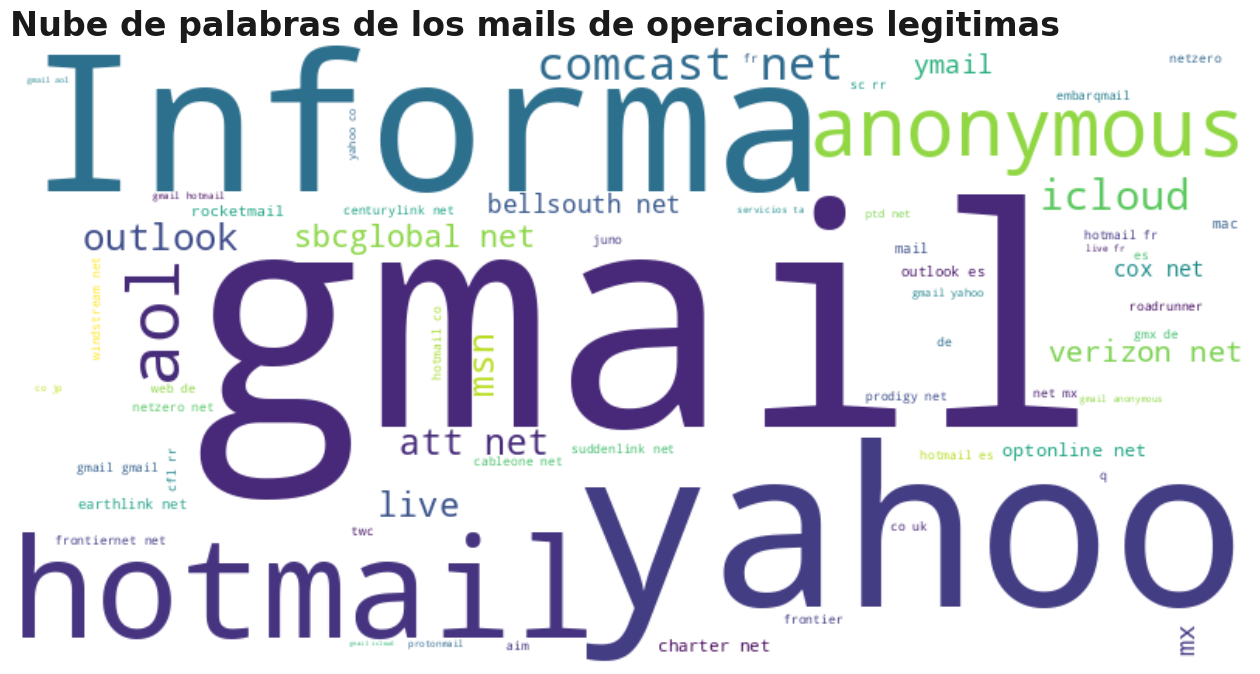

In [ ]:
payer_email_domain = transacciones.loc[transacciones.target==0]['payer_email_domain']
mails = ' '.join(payer_email_domain)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(mails)

plt.figure(figsize=(16, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Nube de palabras de los mails de operaciones legitimas',fontsize=24, loc='left', color='k')

plt.axis('off')
plt.show()

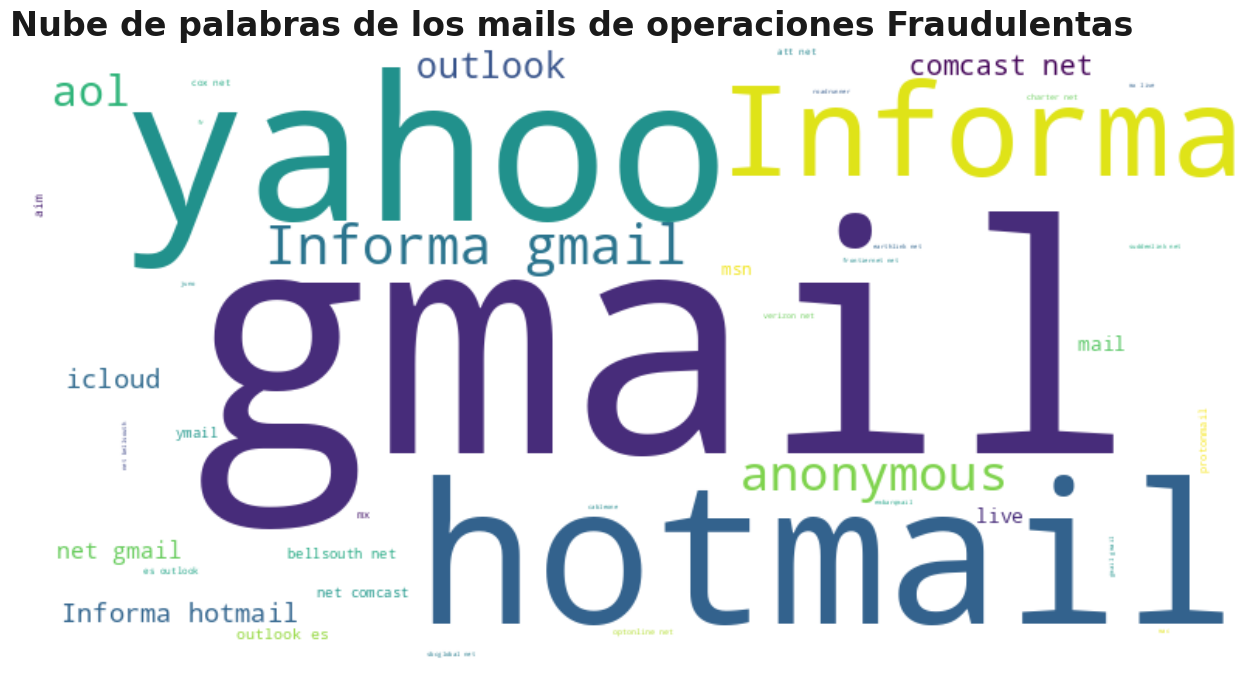

In [ ]:
payer_email_domain = transacciones.loc[transacciones.target==1]['payer_email_domain']
mails = ' '.join(payer_email_domain)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(mails)

plt.figure(figsize=(16, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Nube de palabras de los mails de operaciones Fraudulentas',fontsize=24, loc='left', color='k')

plt.axis('off')
plt.show()

In [ ]:
payer_email_domain0 = transacciones.loc[transacciones.target==0]['payer_email_domain']
mails0 = ' '.join(payer_email_domain0)
wordcloud0 = WordCloud(width=800, height=400, background_color='white').generate(mails0)

payer_email_domain1 = transacciones.loc[transacciones.target==1]['payer_email_domain']
mails1 = ' '.join(payer_email_domain1)
wordcloud1 = WordCloud(width=800, height=400, background_color='white').generate(mails1)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 9))

ax1.imshow(wordcloud0, interpolation='bilinear')
ax1.set_title('Mails de operaciones Legítimas',fontsize=26,loc='left')
ax1.axis('off')

ax2.imshow(wordcloud1, interpolation='bilinear')
ax2.set_title('Mails de operaciones Fraudulentas',fontsize=26,loc='left')
ax2.axis('off')

plt.tight_layout()

plt.show()

<div style="background-color: #003f5c; color: white; border-radius: 5px; padding: 20px; box-shadow: 0px 0px 5px rgba(0,0,0,0.1); font-size: 16px;">
  
**Aqui se muestra en una nube de palabras cuales son las plataforma de mail mas usada segun si la operacion es legitima o fraudulenta**
</div>

In [3]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Creamos un pequeño DataFrame con algunas categorías
data_train = pd.DataFrame({
    'feat_card_4': ['A', 'B', 'C', 'A', 'B']
})

data_valid = pd.DataFrame({
    'feat_card_4': ['A', 'B', 'D', 'E']  # 'D' y 'E' no están en el conjunto de entrenamiento
})

data_test = pd.DataFrame({
    'feat_card_4': ['C', 'F']  # 'F' no está en el conjunto de entrenamiento
})

# Inicializamos el OneHotEncoder con handle_unknown
ohe = OneHotEncoder(handle_unknown='use_encoded_value', sparse_output=False, dtype=int)

# Ajustamos el encoder con los datos de entrenamiento
encoded_train = ohe.fit_transform(data_train[['feat_card_4']])

# Aplicamos la transformación a los datos de validación y prueba
encoded_valid = ohe.transform(data_valid[['feat_card_4']])
encoded_test = ohe.transform(data_test[['feat_card_4']])

# Convertimos las matrices densas a DataFrame para visualizarlas mejor
encoded_train_df = pd.DataFrame(encoded_train, columns=ohe.categories_[0])
encoded_valid_df = pd.DataFrame(encoded_valid, columns=ohe.categories_[0])
encoded_test_df = pd.DataFrame(encoded_test, columns=ohe.categories_[0])

# Mostrar los DataFrames resultantes
print("Entrenamiento:")
print(encoded_train_df)
print("\nValidación:")
print(encoded_valid_df)
print("\nPrueba:")
print(encoded_test_df)

InvalidParameterError: The 'handle_unknown' parameter of OneHotEncoder must be a str among {'infrequent_if_exist', 'error', 'ignore'}. Got 'use_encoded_value' instead.